# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Abhisheik Krishnagiri Tupil Ravikanth - __[abhisheik.krishnagiri.tupil.ravikanth@vub.ac.be](mailto:student1@ulb.ac.be) - Student ID 0575002__
### Sajjad Mahmoudi - __[sajjad.mahmoudi@vub.be](mailto:student2@ulb.ac.be) - Student ID 0573106__
### Tripat Kaur - __[tripat.kaur@vub.be](mailto:student3@ulb.ac.be) - Student ID 0572962__

### Video presentation: https://youtu.be/Q164qI5EOVQ

## Data Driven - Pump It Up


# Introduction

----
Installing the required packages for the code execution.

In [1]:
install.packages('randomForest')
library(randomForest)
install.packages('tidyverse')
library(tidyverse)
install.packages("caret")
library(caret)
install.packages("class")
library(class)
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)
install.packages("corrplot")
library(corrplot)

Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine()  masks randomForest::combine()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()
x ggplot2::margin() masks randomForest::margin()

Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
caret 6.0-86 6.0-88              TRUE

  Binaries will be installed
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'class' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'class'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\HP\Documents\R\win-library\4.0\00LOCK\class\libs\x64\class.dll to C:\Users\HP\Documents\R\win-library\4.0\class\libs\x64\class.dll: Permission denied"
Warning message:
"restored 'class'"



The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages


corrplot 0.88 loaded



In [2]:
#defining functions for caluclating precision, recall, and f1-score
calc_precision <- function(confusion_matrix){
    precision <- rep(0,length(confusion_matrix[,1]))
    for (col in seq(1,length(confusion_matrix[,1]))){
       precision[col] <-confusion_matrix[col,col]/sum(confusion_matrix[1:3,col])*100
    }
    return (precision)
}

calc_recall <- function(confusion_matrix){
    recall <- rep(0,length(confusion_matrix[,1]))
    for (row in seq(1,length(confusion_matrix[,1]))){
       recall[row] <- confusion_matrix[row,row]/sum(confusion_matrix[row,1:3])*100
    }
    return (recall)
}

calc_f1 <- function(precision,recall){
    f1 <- rep(0,length(precision))
    for (i in seq(1, length(precision))){
        f1[i] <- (2*((precision[i]*recall[i])/(precision[i]+recall[i])))
    }
    return (f1)
}

### Reading the training input and output data and combining them into one drataframe and getting summary

In [3]:
# replacing all blanks values with NA
training_data_x <- read.csv('Training_Data.csv',na.strings="")
training_data_y <- read.csv('Training_Set_Labels.csv',na.strings="")
testing_data_x <- read.csv('Test_Data.csv',na.strings="")

training_data_set <- merge(x=training_data_x, y=training_data_y,by="id",all=TRUE)
training_data_set_catboost <- data.frame(training_data_set)
lapply(training_data_set,function(x) cbind(summary(x)))

Min.,0.00
1st Qu.,18519.75
Median,37061.50
Mean,37115.13
3rd Qu.,55656.50
Max.,74247.00
Min.,0.0000
1st Qu.,0.0000
Median,0.0000
Mean,317.6504
3rd Qu.,20.0000


### Visualizing how the data is distributed over the target variable

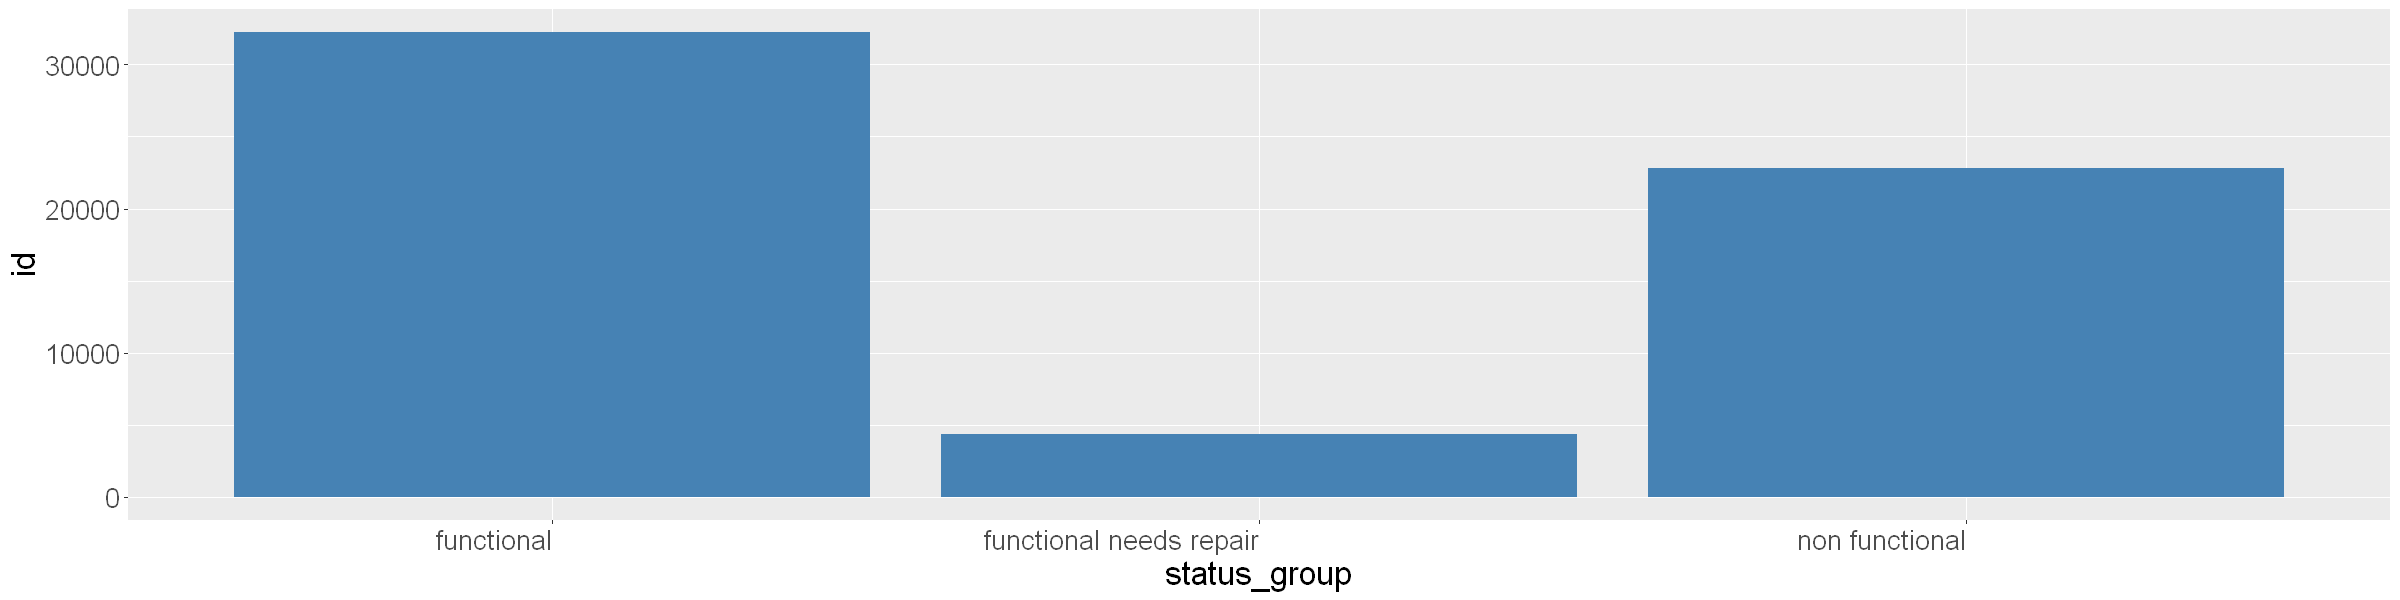

In [4]:
aggregat_count_status_group <- aggregate(id~status_group,training_data_set,function(x){length(unique(x))})
options(repr.plot.width=20, repr.plot.height=5)
ggplot(aggregat_count_status_group, aes(x=status_group, y=id)) +
geom_bar(stat="identity",fill="steelblue")+theme(text = element_text(size=20),
        axis.text.x = element_text( hjust=1))                                                                                  

-----
As we see there is hight amount of imbalance in the data. Accuracy thus might not be a good measure of how well a model performs. 

## Task 1 - Data Preprocessing and Feature Selection

### Starting the process of feature selecting by doing analysis over the various columns

#### 1. We have taken the summary of all columns. Looking at the mean and median of num_private it is clear that it contains mostly 0 values. So we can drop that column.

In [5]:
training_data_set <- subset(training_data_set,select=-num_private)

#### 2. Next we look at those columns which have only one constant value. We can remove those columns since they will not provide any information to the model

In [6]:
unique_value_list <- apply(training_data_set, 2, function(x) length(unique(x)))
print(sort(unique_value_list))

          recorded_by        public_meeting                permit 
                    1                     3                     3 
         source_class          status_group      management_group 
                    3                     3                     5 
             quantity        quantity_group         quality_group 
                    5                     5                     6 
waterpoint_type_group extraction_type_class               payment 
                    6                     7                     7 
         payment_type           source_type       waterpoint_type 
                    7                     7                     7 
        water_quality                 basin                source 
                    8                     9                    10 
           management     scheme_management extraction_type_group 
                   12                    13                    13 
      extraction_type         district_code                reg

---
#### Conclusion from 2
a) recorded_by can be removed as it is constant throughout the dataset.\
b) wpt_name is the name of the waterpump. Since it has 37,400 unique values it can be implied that it does not really affect the functionality of a water pump. So this feature can be removed. 

In [7]:
training_data_set <- subset(training_data_set, select = -c(wpt_name,recorded_by))

In [8]:
# getting the number of distinct values per feature to identify which featurs can be removed because they have only one unqieu value throughout
col_name <- colnames(training_data_set)
training_data_set <- training_data_set[sapply(training_data_set,function(x)length(unique(x))>1)]

#### 3. Next we take a look at the columns with missing values. We have already replaced the blank spaces in the dataset with NA while reading the csv file.

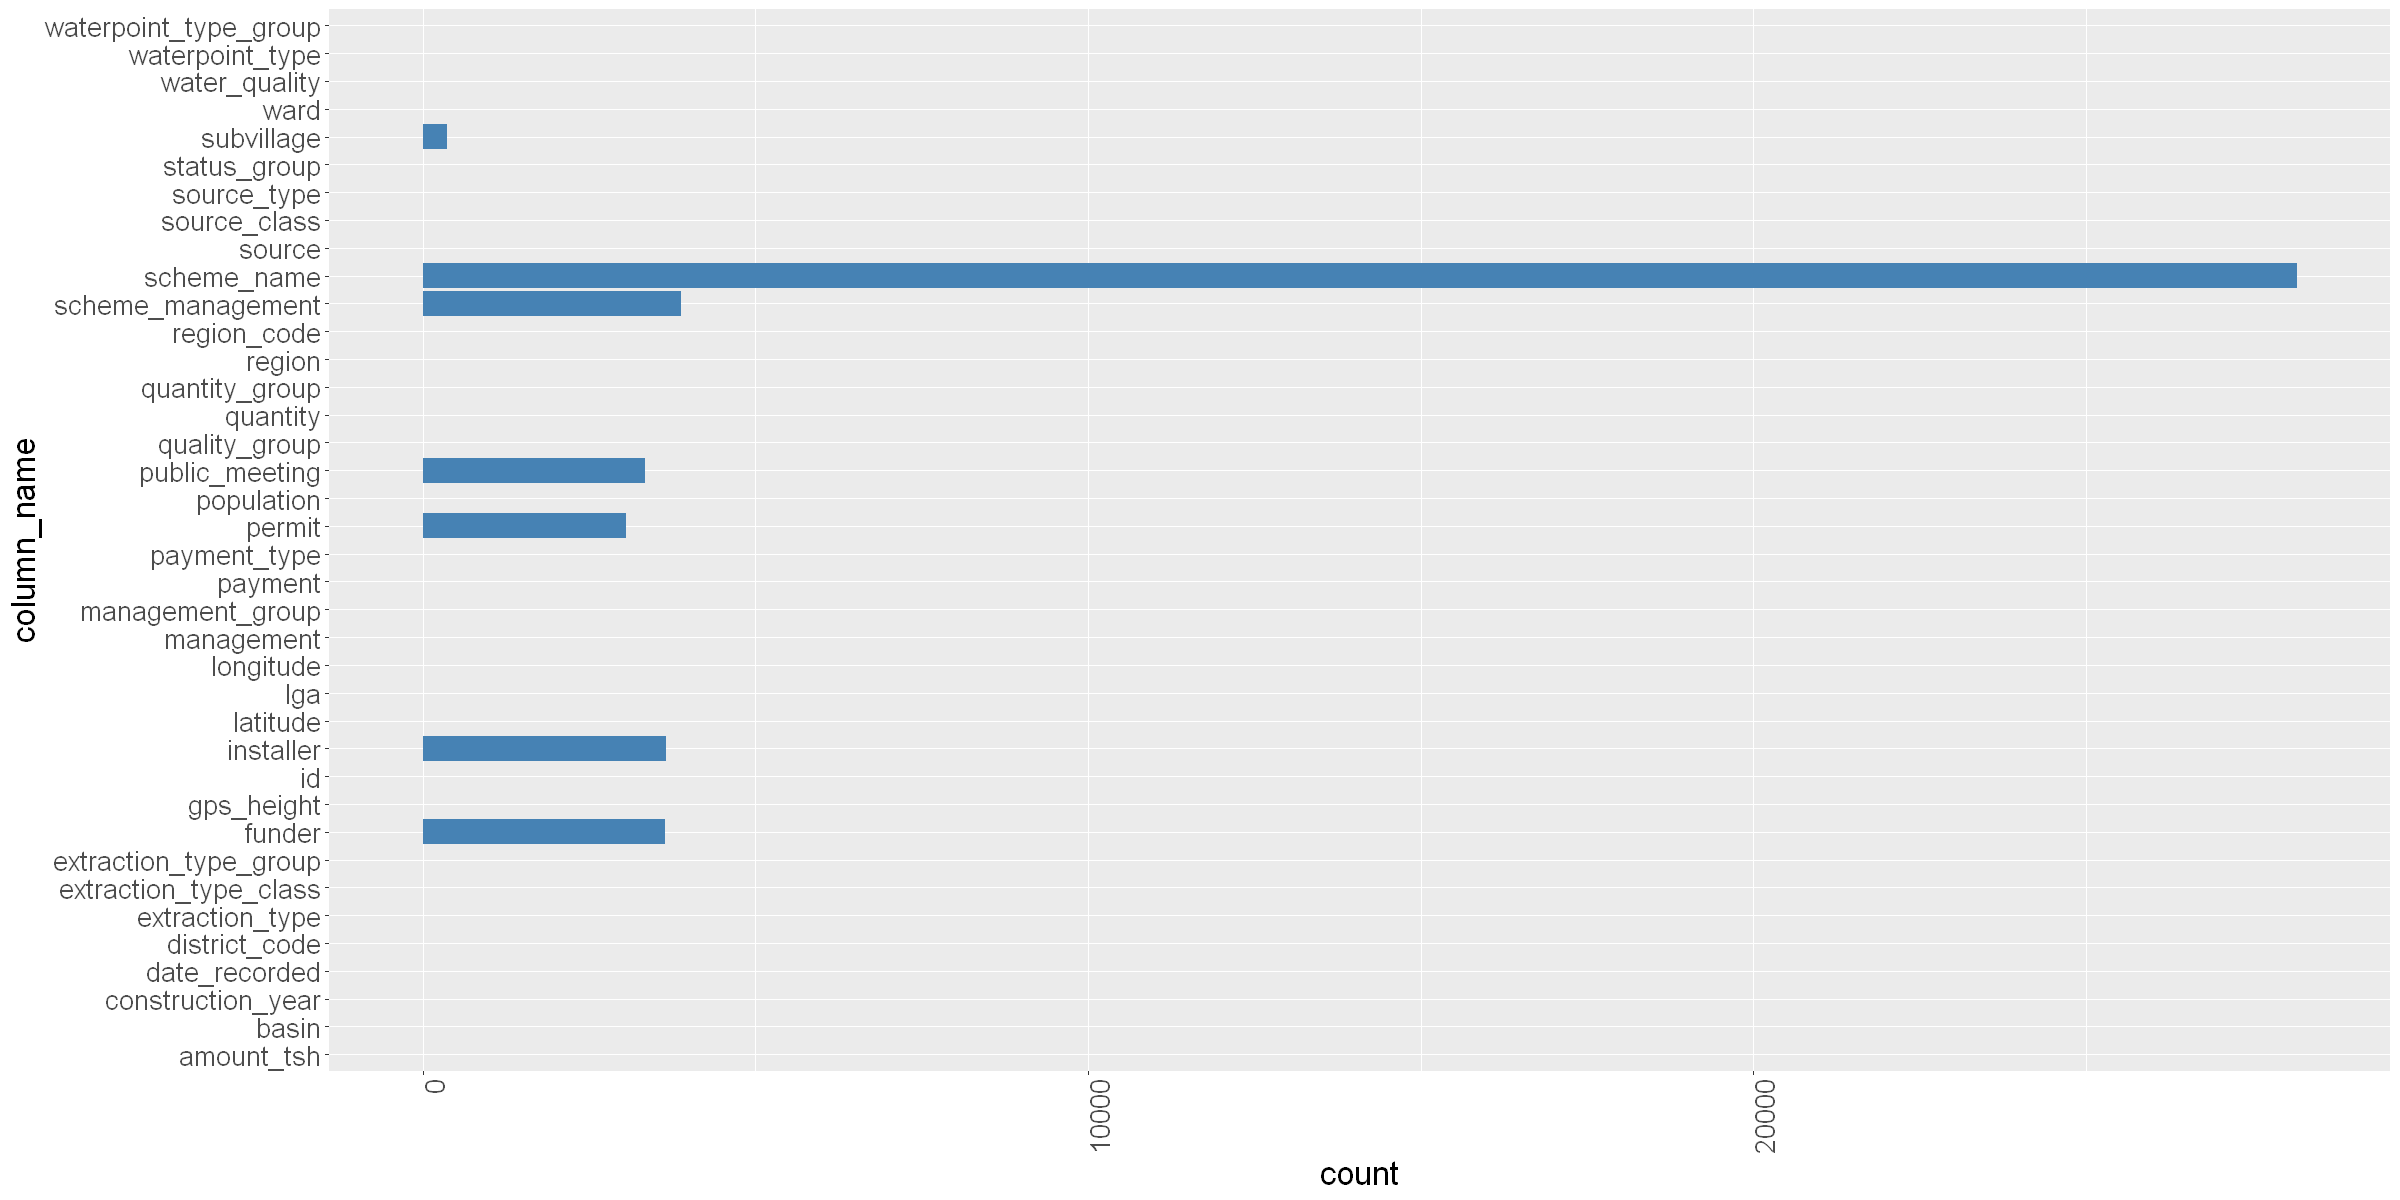

In [9]:
count_missing_values <- data.frame("column_name"=c(colnames(training_data_set)),"count"=apply(training_data_set,2,function(x){sum(is.na(x))}))
# print(count_missing_values[1,2])
options(repr.plot.width=20, repr.plot.height=10)
ggplot(count_missing_values, aes(x=column_name, y=count)) +
geom_bar(stat="identity",fill="steelblue")+coord_flip()+theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 


---
#### Conclusion from 3
As we can see from the above chart scheme_name is the column with the maximum missing values. So we can drop that column. Also it will not have much effect because we get the same information from the scheme_management column. For all columns that contain "Other" as a value the missing values can be replaced by the same.

In [10]:
training_data_set <- subset(training_data_set,select=-scheme_name)
training_data_set$scheme_management[training_data_set$scheme_management==NA]<-'Other'
training_data_set$funder[training_data_set$funder==NA]<-'Others'

#### 4. Next we can look at some categorical variables and use the chi square test to identify the relation between them

In [11]:
training_data_set[1:5,]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Lake Tanganyika,Majengo,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,Rufiji,Magoda C,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Wami / Ruvu,Songambele,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Pangani,Urereni,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Wami / Ruvu,Maata A,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


---
#### 4.a) We look at the water quality and quality group

In [12]:
tbl <- table(training_data_set$water_quality,training_data_set$quality_group)
tbl
chisq.test(tbl)

                    
                     colored fluoride  good milky salty unknown
  coloured               490        0     0     0     0       0
  fluoride                 0      200     0     0     0       0
  fluoride abandoned       0       17     0     0     0       0
  milky                    0        0     0   804     0       0
  salty                    0        0     0     0  4856       0
  salty abandoned          0        0     0     0   339       0
  soft                     0        0 50818     0     0       0
  unknown                  0        0     0     0     0    1876

Warning message in chisq.test(tbl):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl
X-squared = 297000, df = 35, p-value < 2.2e-16


---
#### Conclusion from 4.a
As we see in the table above water_quality and quality_group are higly related to one another. Also because of such a low p-values we can imply that water_quality is a sub category of quality_group. So we can again eliminate one of the two. 

---
#### 4.b) We can do a similar test on payment and payment_type. This time we are visualising the data in both columns to arrive to a conclusion.

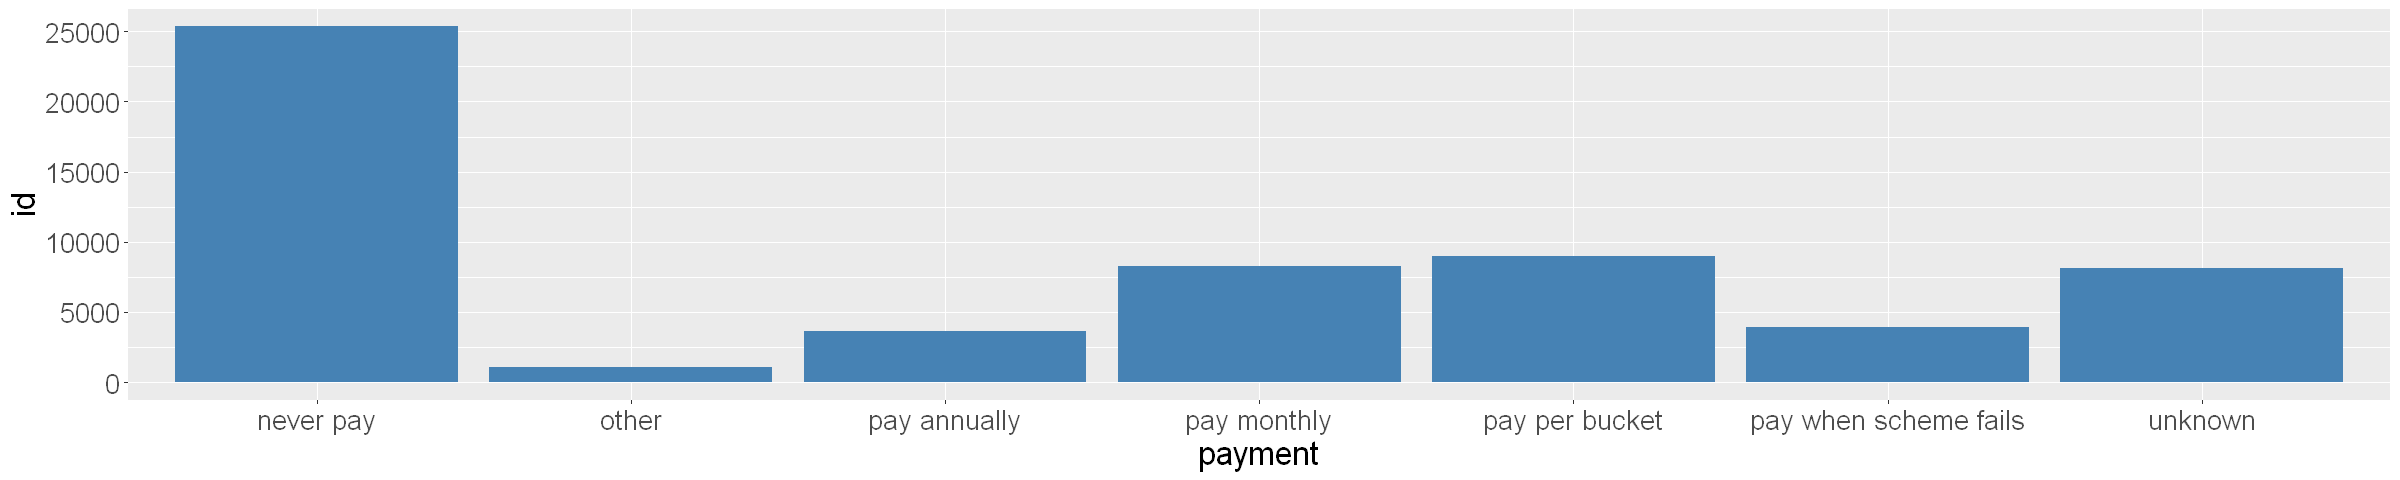

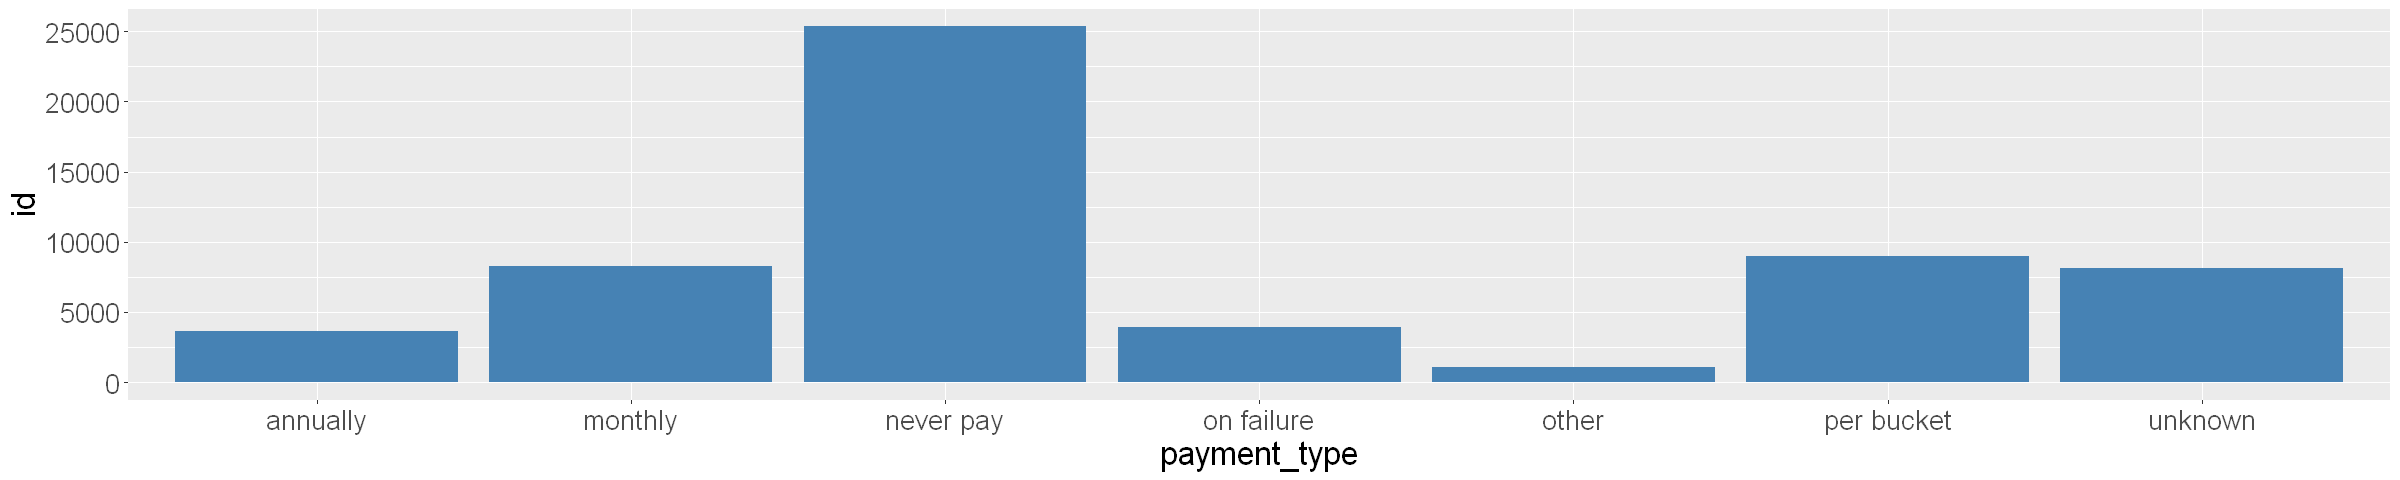

In [13]:
# training_data_set["count"] <- 1
options(repr.plot.width=20, repr.plot.height=4)
group_by_payment_count <- aggregate(id~payment,training_data_set, function(x) length(unique(x)))
group_by_payment_type_count <- aggregate(id~payment_type,training_data_set, function(x) length(unique(x)))
ggplot(group_by_payment_count,aes(x=payment,y=id))+geom_bar(stat="identity", fill="steelblue")+theme(text = element_text(size=20))
ggplot(group_by_payment_type_count,aes(x=payment_type,y=id))+geom_bar(stat="identity", fill="steelblue")+theme(text = element_text(size=20))

-----
#### Conclusion from 4.b
From the above charts we can see that payment and payment type provide the same information. So we can eliminate one column from our training dataset

---
#### 4.c) Next we look at management and management_group

In [14]:
tbl_manage <- table(training_data_set$management,training_data_set$management_group)
print(chisq.test(tbl_manage))

Warning message in chisq.test(tbl_manage):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl_manage
X-squared = 237600, df = 44, p-value < 2.2e-16



#### 4.d) We look at quantity and quantity group

In [15]:
tbl_quantity <- table(training_data_set$quantity,training_data_set$quantity_group)
print(tbl_quantity)
print(chisq.test(tbl_quantity))

              
                 dry enough insufficient seasonal unknown
  dry           6246      0            0        0       0
  enough           0  33186            0        0       0
  insufficient     0      0        15129        0       0
  seasonal         0      0            0     4050       0
  unknown          0      0            0        0     789

	Pearson's Chi-squared test

data:  tbl_quantity
X-squared = 237600, df = 16, p-value < 2.2e-16



#### 4.e) We look at waterpoint type and waterpoint type group

In [16]:
tbl_waterpoint <- table(training_data_set$waterpoint_type,training_data_set$waterpoint_type_group)
print(tbl_waterpoint)
print(chisq.test(tbl_waterpoint))

                             
                              cattle trough communal standpipe   dam hand pump
  cattle trough                         116                  0     0         0
  communal standpipe                      0              28522     0         0
  communal standpipe multiple             0               6103     0         0
  dam                                     0                  0     7         0
  hand pump                               0                  0     0     17488
  improved spring                         0                  0     0         0
  other                                   0                  0     0         0
                             
                              improved spring other
  cattle trough                             0     0
  communal standpipe                        0     0
  communal standpipe multiple               0     0
  dam                                       0     0
  hand pump                                 0   

Warning message in chisq.test(tbl_waterpoint):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl_waterpoint
X-squared = 297000, df = 30, p-value < 2.2e-16



#### 4.f) Source, Source class and source type

In [17]:
print("Chi-square test for source_type and source_class")
tbl_source_type_class <- table(training_data_set$source_type,training_data_set$source_class)
# print(tbl_waterpoint)
print(chisq.test(tbl_source_type_class))

print("Chi-square test for source and source_class")
tbl_source <- table(training_data_set$source,training_data_set$source_class)
print(chisq.test(tbl_source))

print("Chi-square test for source_type and source")
table_source_type <- table(training_data_set$source,training_data_set$source_type)
print(chisq.test(table_source_type))

[1] "Chi-square test for source_type and source_class"


Warning message in chisq.test(tbl_source_type_class):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl_source_type_class
X-squared = 118800, df = 12, p-value < 2.2e-16

[1] "Chi-square test for source and source_class"


Warning message in chisq.test(tbl_source):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl_source
X-squared = 118800, df = 18, p-value < 2.2e-16

[1] "Chi-square test for source_type and source"


Warning message in chisq.test(table_source_type):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table_source_type
X-squared = 356400, df = 54, p-value < 2.2e-16



---
#### Conclusion 
(source_type and source_class) and (source and source_class) have a lower values of X^2 compared to (source and source_type). So we will choose either one or two. 

---
#### 4.g) extraction, extraction_type_group and extraction_type_class

In [18]:
print("Chi-square test for extraction and extraction_type_group")
tbl_extraction_type_group <- table(training_data_set$extraction_type,training_data_set$extraction_type_group)
# print(tbl_waterpoint)
print(chisq.test(tbl_extraction_type_group))

print("Chi-square test for extraction and extraction_type_class")
tbl_extraction  <- table(training_data_set$extraction_type,training_data_set$extraction_type_class)
print(chisq.test(tbl_extraction))

print("Chi-square test for extraction_type_group and extraction_type_class")
table_extraction_type <- table(training_data_set$extraction_type_group,training_data_set$extraction_type_class)
print(chisq.test(table_extraction_type))

[1] "Chi-square test for extraction and extraction_type_group"


Warning message in chisq.test(tbl_extraction_type_group):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl_extraction_type_group
X-squared = 712800, df = 204, p-value < 2.2e-16

[1] "Chi-square test for extraction and extraction_type_class"


Warning message in chisq.test(tbl_extraction):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl_extraction
X-squared = 356400, df = 102, p-value < 2.2e-16

[1] "Chi-square test for extraction_type_group and extraction_type_class"


Warning message in chisq.test(table_extraction_type):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table_extraction_type
X-squared = 356400, df = 72, p-value < 2.2e-16



---
#### 4.h) Next we take a look at funder and installer. But since both of them are in different cases, first we need to convert them to the same case and then use chi-square test to identify if there is a relation between the two.

In [19]:
training_data_set$funder <- tolower(training_data_set$funder)
training_data_set$installer <- tolower(training_data_set$installer)

print(chisq.test(table(training_data_set$funder,training_data_set$installer)))

Warning message in chisq.test(table(training_data_set$funder, training_data_set$installer)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(training_data_set$funder, training_data_set$installer)
X-squared = NaN, df = 3666864, p-value = NA



#### We get NaN as X-Squared because the value is too small. But we infer that funder and installer are correlated by the high df value and also by observing the dataset

----
#### Removing all the columns that have been till now discussed that won't impart any extra information

In [20]:
training_data_set <- subset(training_data_set,select = -c(water_quality,payment_type,management_group,waterpoint_type,source_type,extraction_type,installer,quantity,source_class,extraction_type_group))

### We also have a look at how the left over columns are affecting the status of a water pump.

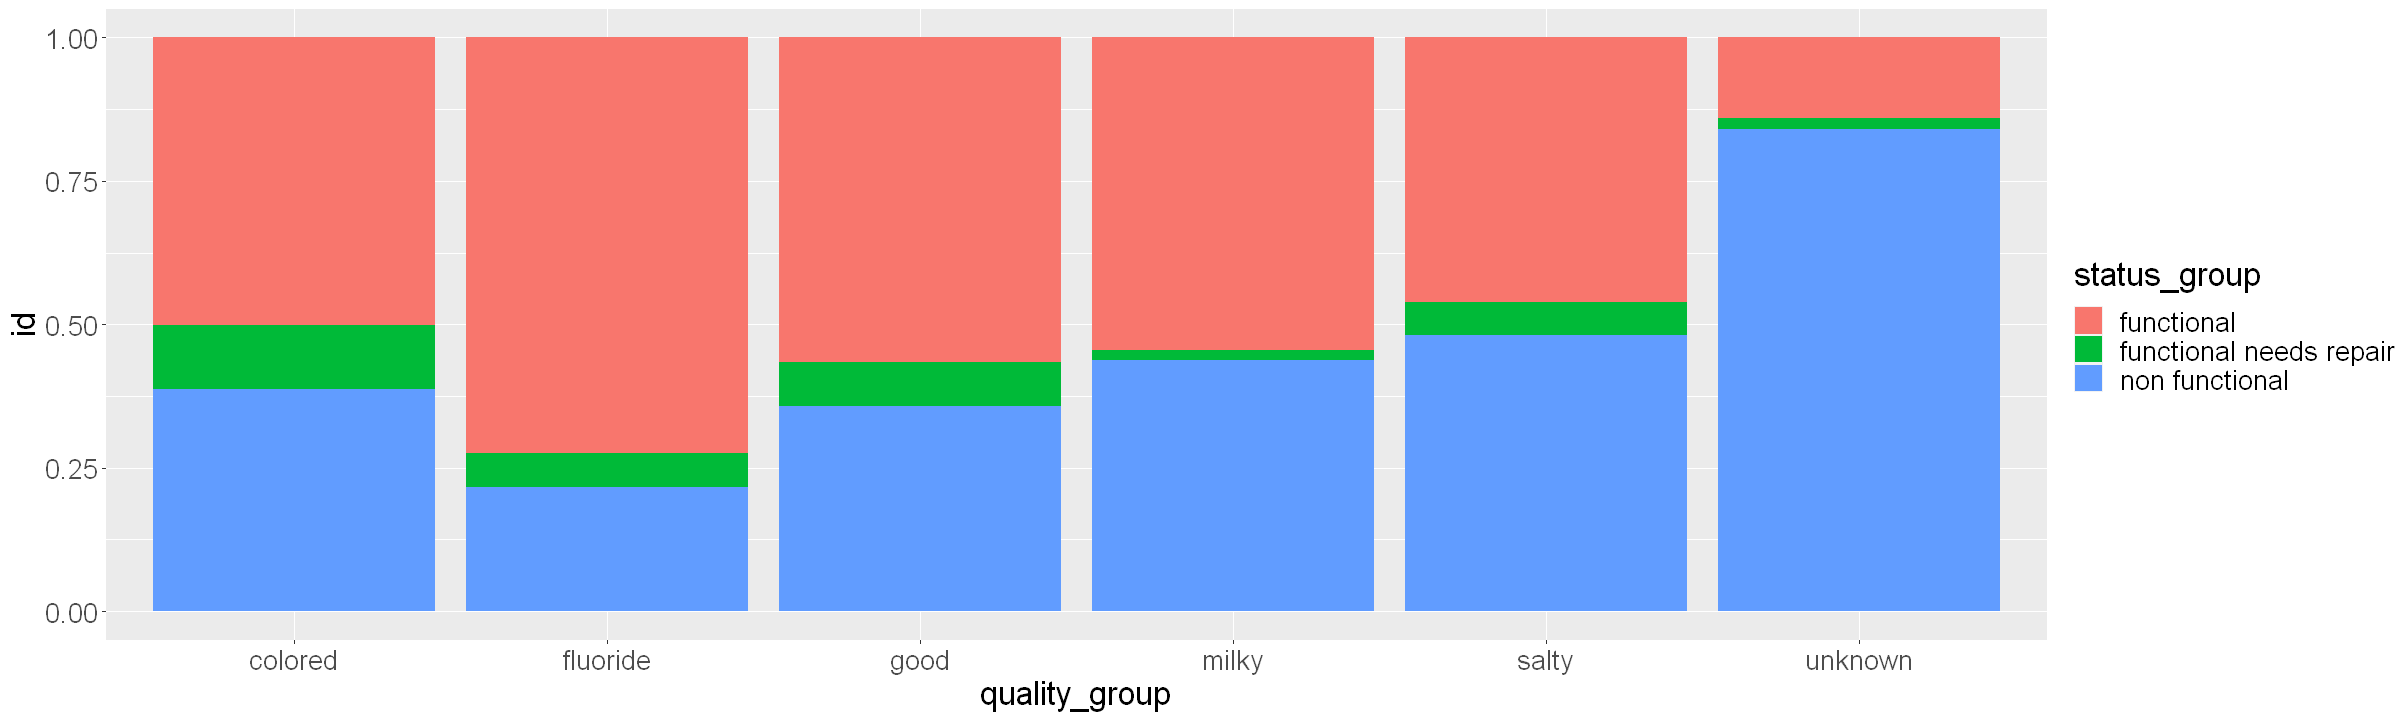

In [21]:
group_by_quality_group <- aggregate(id~quality_group+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_quality_group, aes(fill=status_group, y=id, x=quality_group)) + 
    geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

#### We can see that depending on the quality of water the status of the water pump changes. If the water has a lot of fluoride the pump is functional. But for salty water the pump becomes non functional.

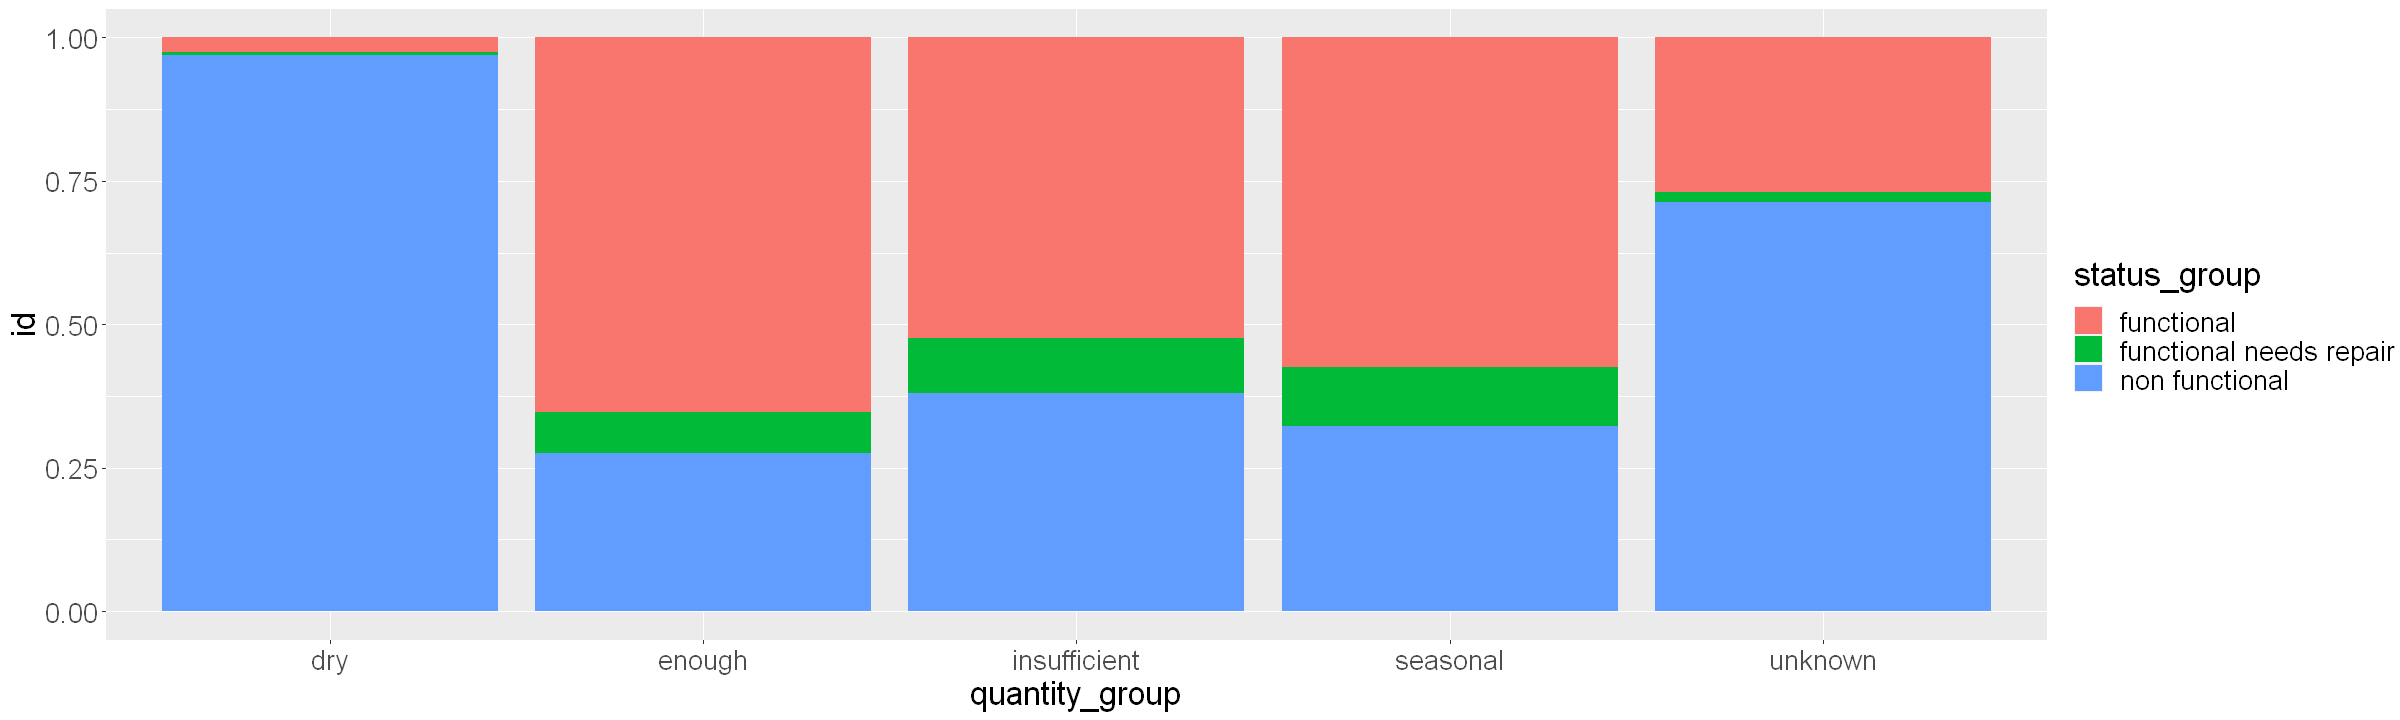

In [22]:
group_by_quantity_group <- aggregate(id~quantity_group+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_quantity_group, aes(fill=status_group, y=id, x=quantity_group)) + 
    geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

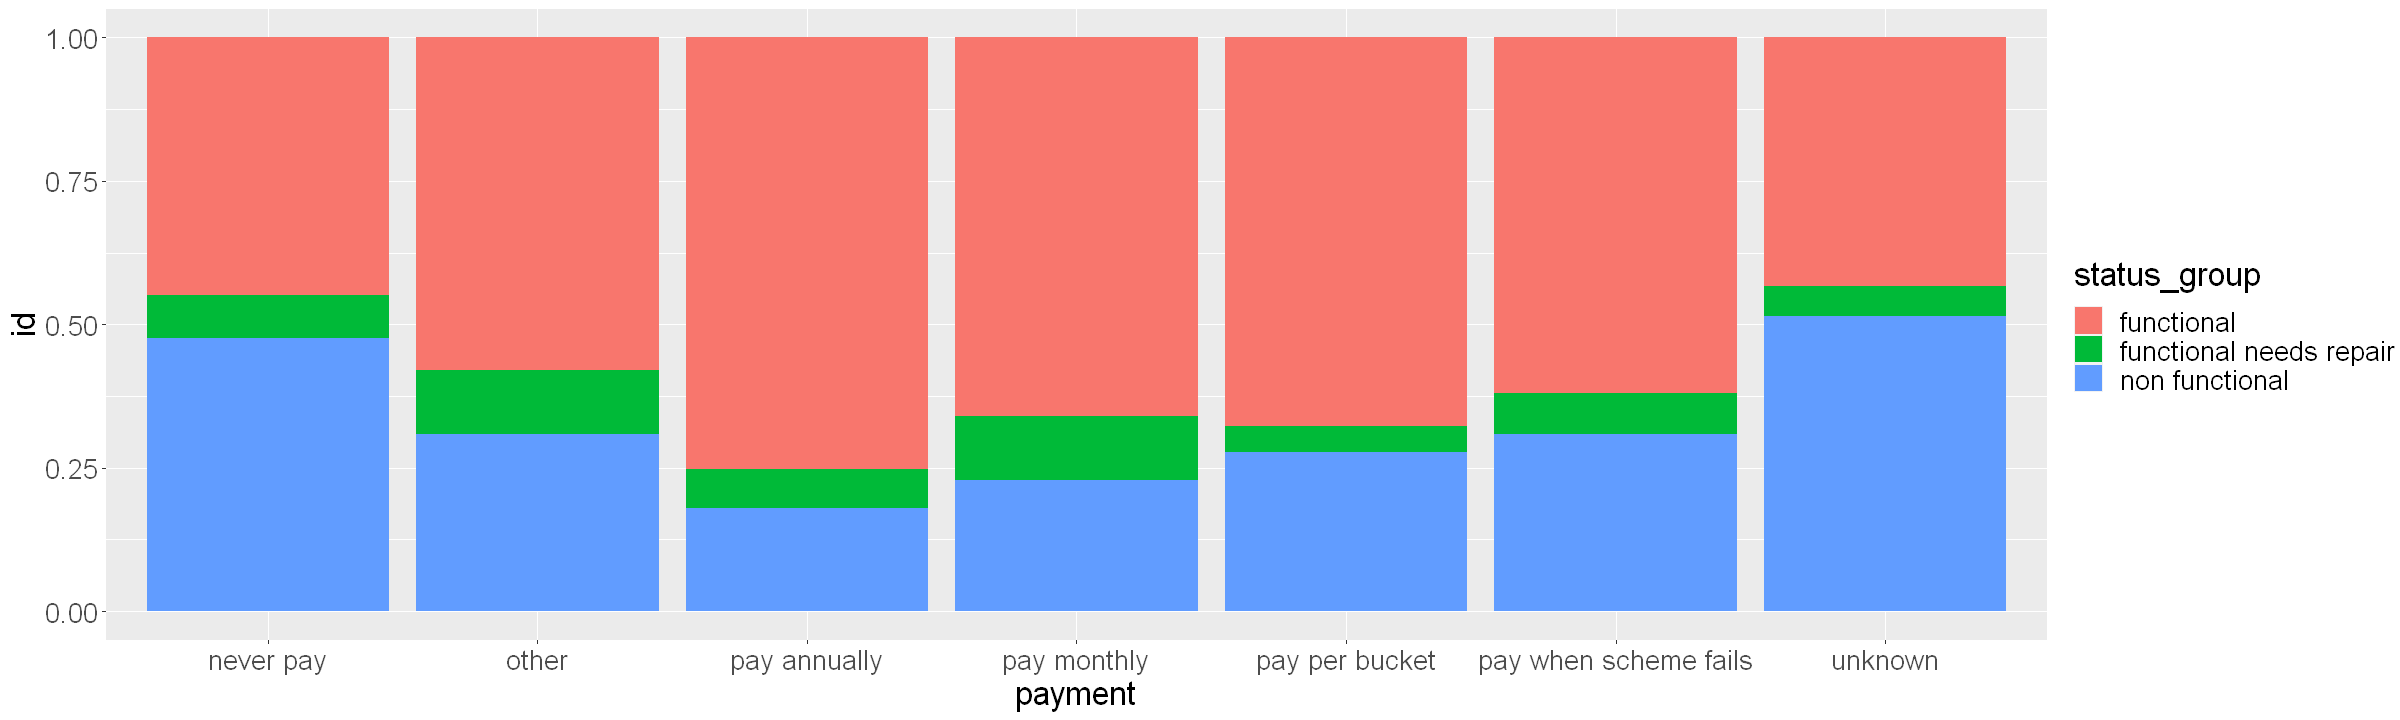

In [23]:
group_by_payment <- aggregate(id~payment +status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_payment , aes(fill=status_group, y=id, x=payment )) + geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

#### When payments are not done more pumps are non functional compared to when payments are done annually.

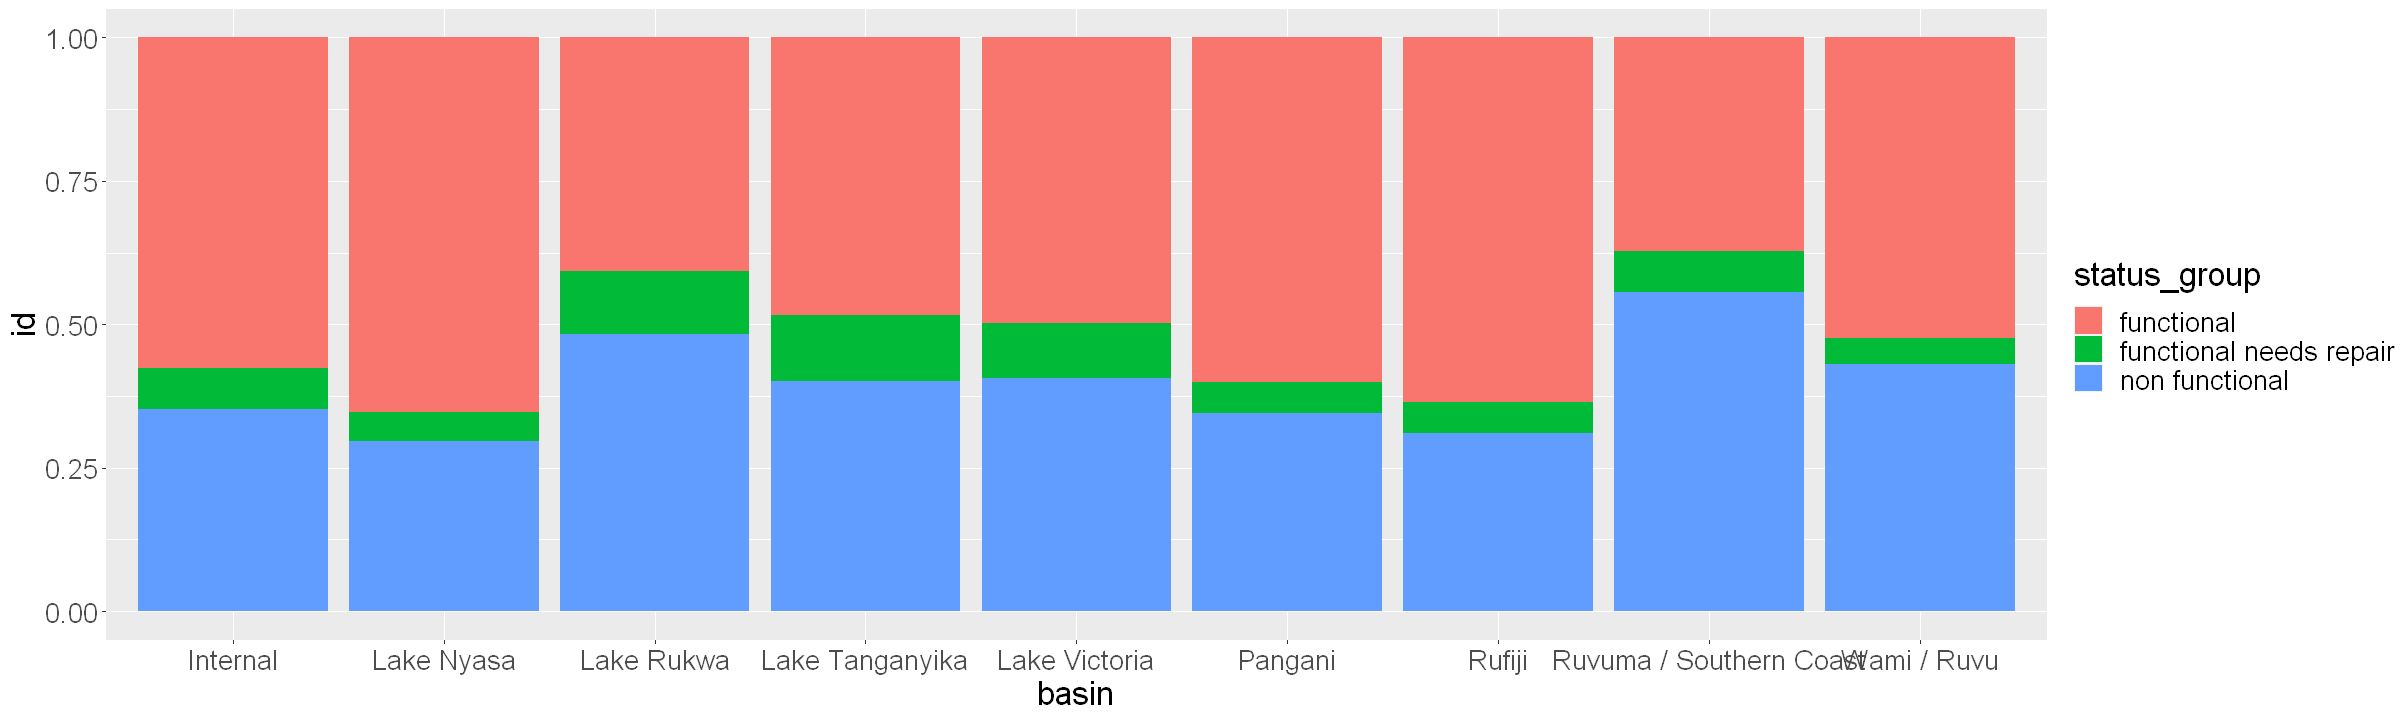

In [24]:
group_by_basin <- aggregate(id~basin +status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_basin , aes(fill=status_group, y=id, x=basin)) + geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

#### The quantity of water also clearly affects the status. Dry pumps are mostly non functional whereas pumps where there is enough water are functional.

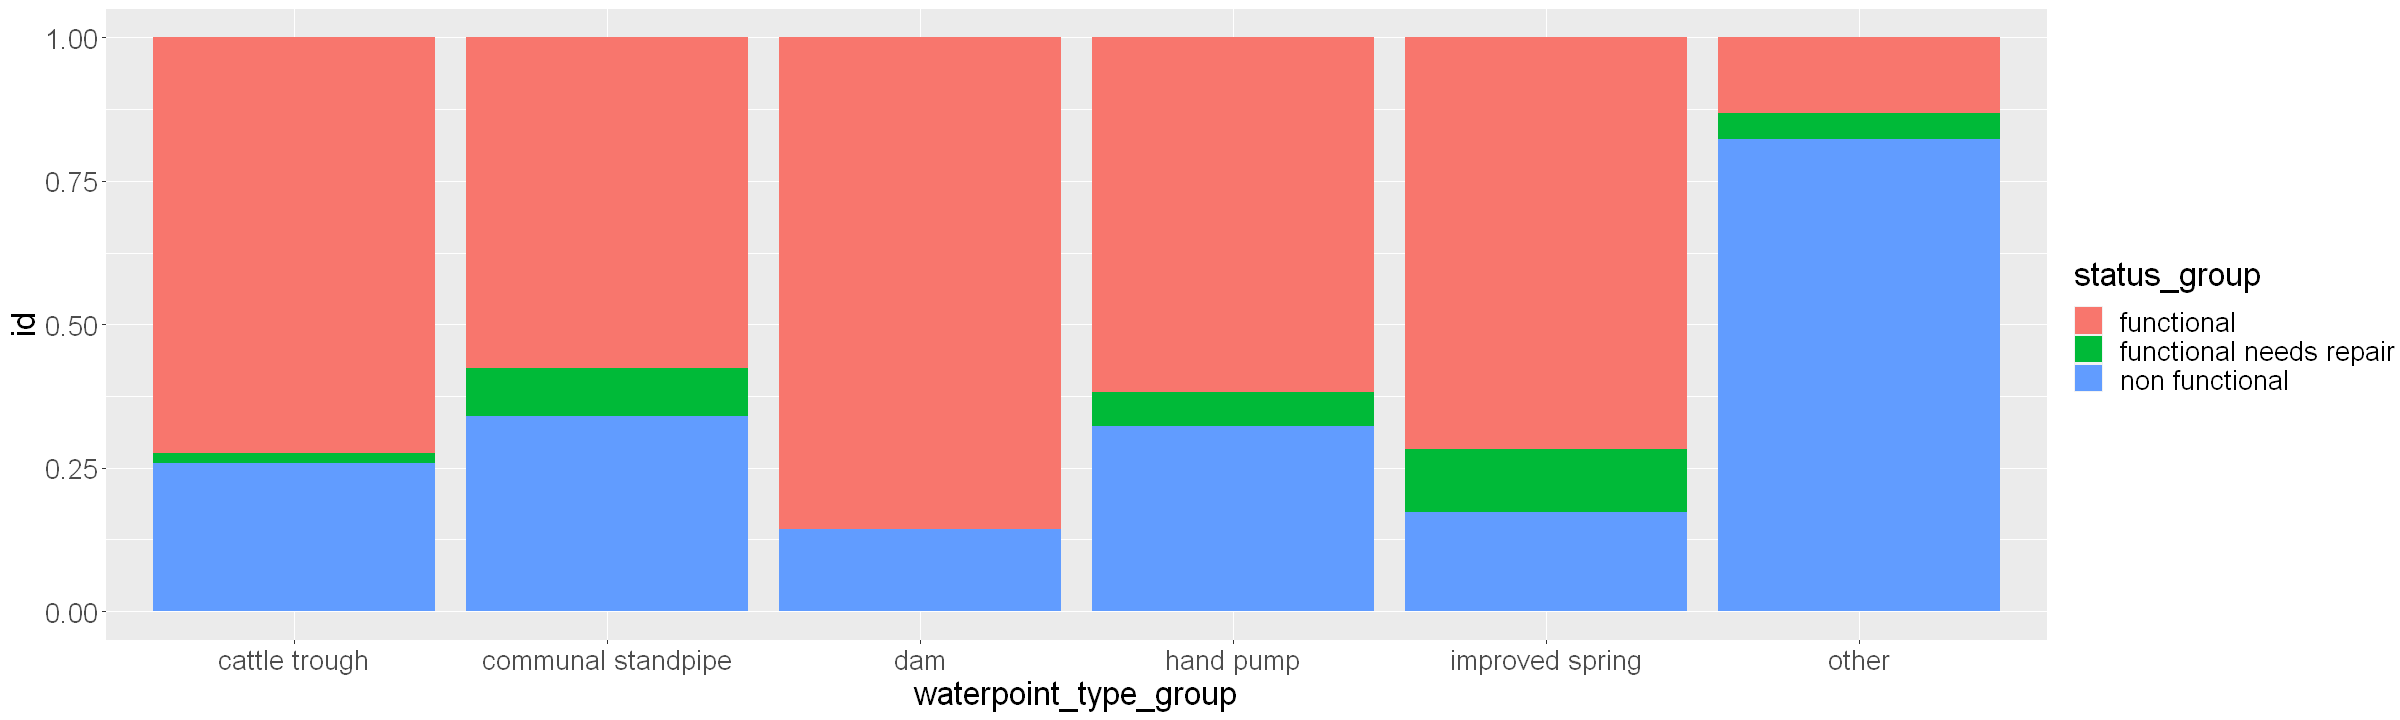

In [25]:
group_by_waterpoint_group <- aggregate(id~waterpoint_type_group+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_waterpoint_group, aes(fill=status_group, y=id, x=waterpoint_type_group)) + 
    geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

#### The type of water pump also clearly affects the status. If it is a dam chances are the water pump will be functional. For other categories water pumps are mostly non functional.

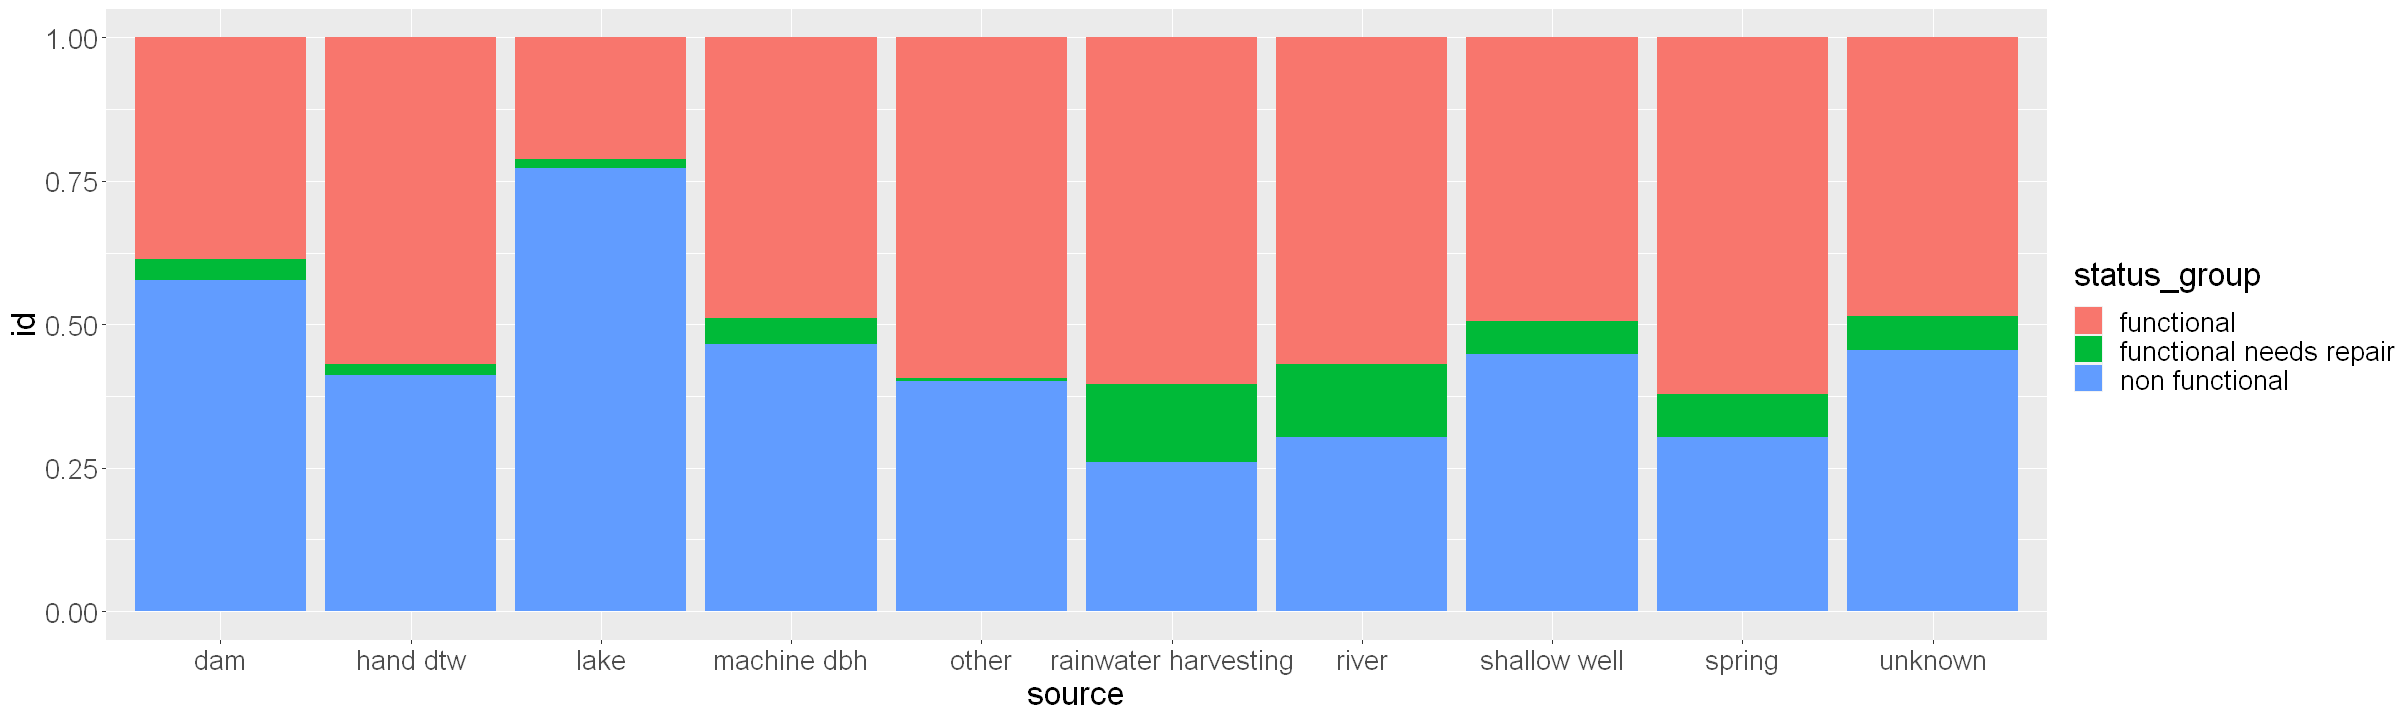

In [26]:
group_by_source <- aggregate(id~source+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_source, aes(fill=status_group, y=id, x=source)) + 
    geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

#### The source of water pump also affects the status. If the source is lake and dam most of the pumps are non functional. For the rest of the categories there is not a large differentiation. So we keep this feature.

#### 5. Since we have the constructed year and the date recorded, we can find out the age of the pump and check if it has an effect on its functionality

In [27]:
# relacing all 0s with median of construction year
# training_data_set$construction_year[training_data_set["construction_year"]==0] <-median(training_data_set$construction_year)
date_recorded_in_years <- as.numeric(format(as.Date(training_data_set$"date_recorded"),"%Y"))
# print(training_data_set$construction_year[training_data_set$construction_year<1986])
training_data_set["age"] <-   date_recorded_in_years - training_data_set["construction_year"]
training_data_set$age[training_data_set["age"]==as.numeric(format(as.Date(training_data_set$"date_recorded"),"%Y"))] <- median(training_data_set$age)

#### Since there is 0 in construction year we can replace that with the median to be able to calculate the age of the pump by subtracting the date_recorded and construction_year to get one feature called age.

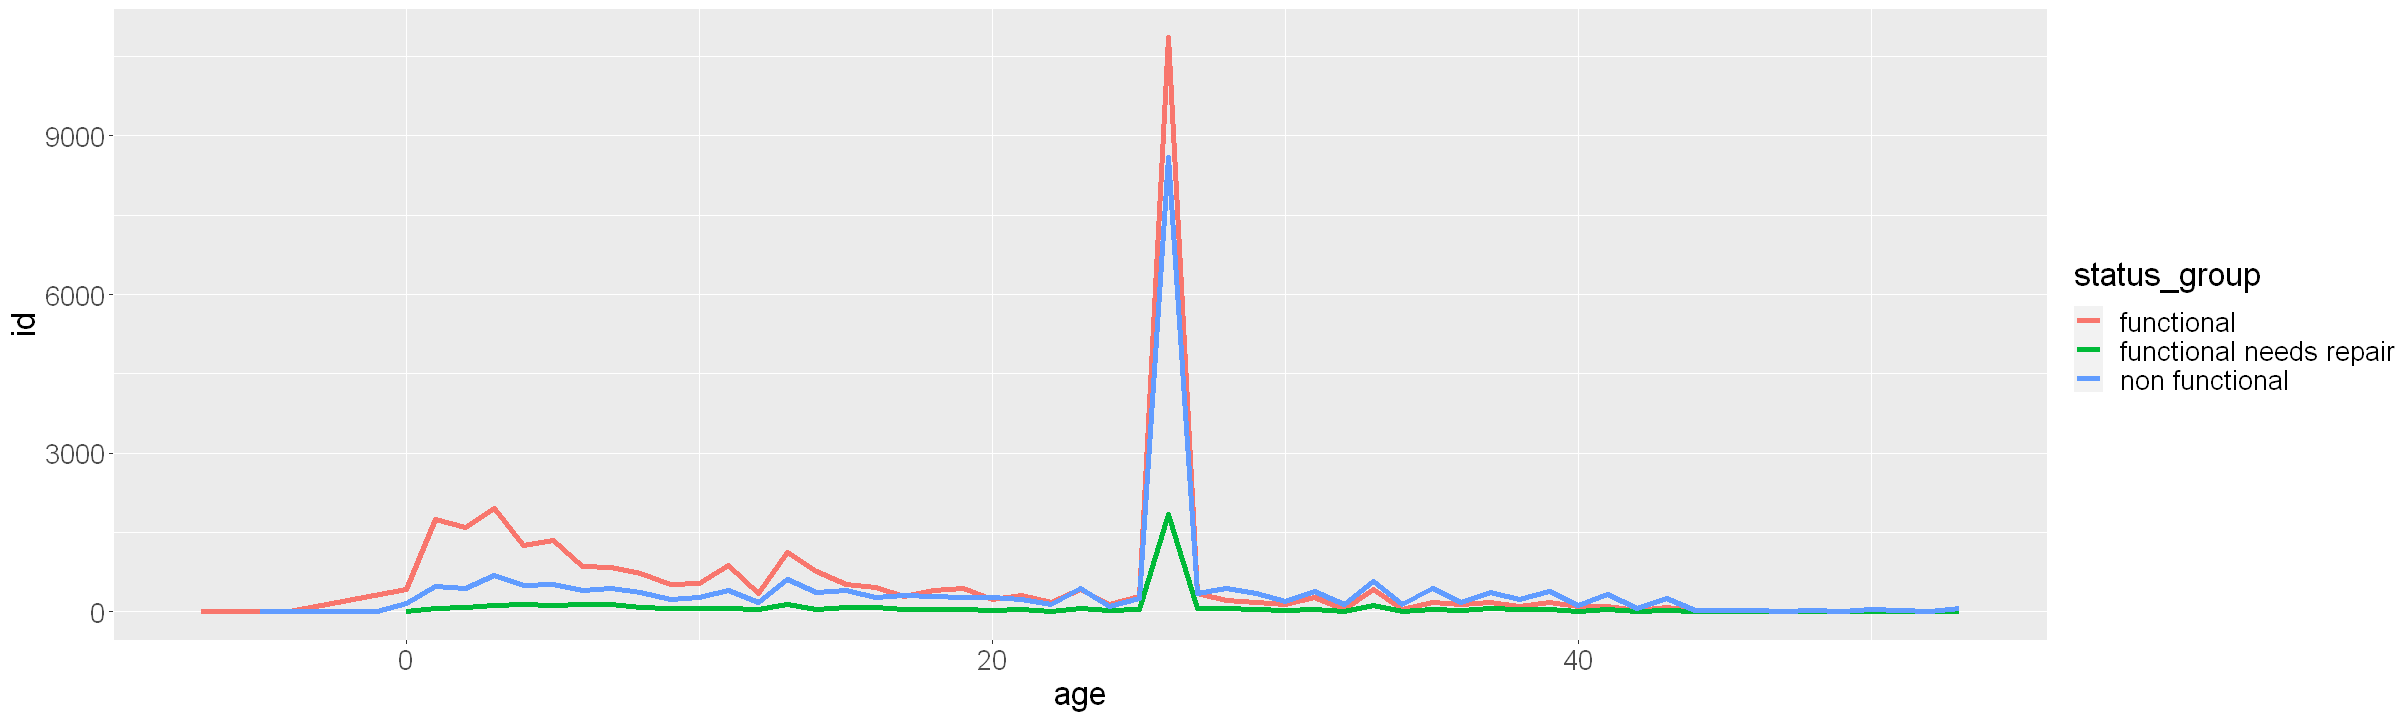

In [28]:
group_by_age <- aggregate(id~age+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_age)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_age, aes(x = age, y = id)) + 
  geom_line(aes(color = status_group),size=1.5)+theme(text = element_text(size=20))

---
#### Conclusion from 5
As the age increases after around 30 the number of functioning pumps decreases. Also we see some values are below 0 indicating that at certain places the age is negative. The constructed year is after the recorded date. So we can filter out those records and continue to keep age as a variable and remove date_recorded and construction_year

In [29]:
training_data_set <- training_data_set[!(training_data_set["age"]<0),]
training_data_set <- subset(training_data_set,select=-c(date_recorded,construction_year))

In [30]:
colnames(training_data_set)

[1] "id"                    "amount_tsh"            "funder"               
 [4] "gps_height"            "longitude"             "latitude"             
 [7] "basin"                 "subvillage"            "region"               
[10] "region_code"           "district_code"         "lga"                  
[13] "ward"                  "population"            "public_meeting"       
[16] "scheme_management"     "permit"                "extraction_type_class"
[19] "management"            "payment"               "quality_group"        
[22] "quantity_group"        "source"                "waterpoint_type_group"
[25] "status_group"          "age"

#### 6. Next we look at the numerical features and see if there are any missing values. Also we find the correlation between the numerical values to see if any features could be eliminated.

In [31]:
# print(unique(training_data_set$population))
# 0 population does not make sense so we replace it with the mean of the population
training_data_set$population[training_data_set$population==0] <- mean(training_data_set$population)
# for gps_height and amount_tsh 0 values are acceptable

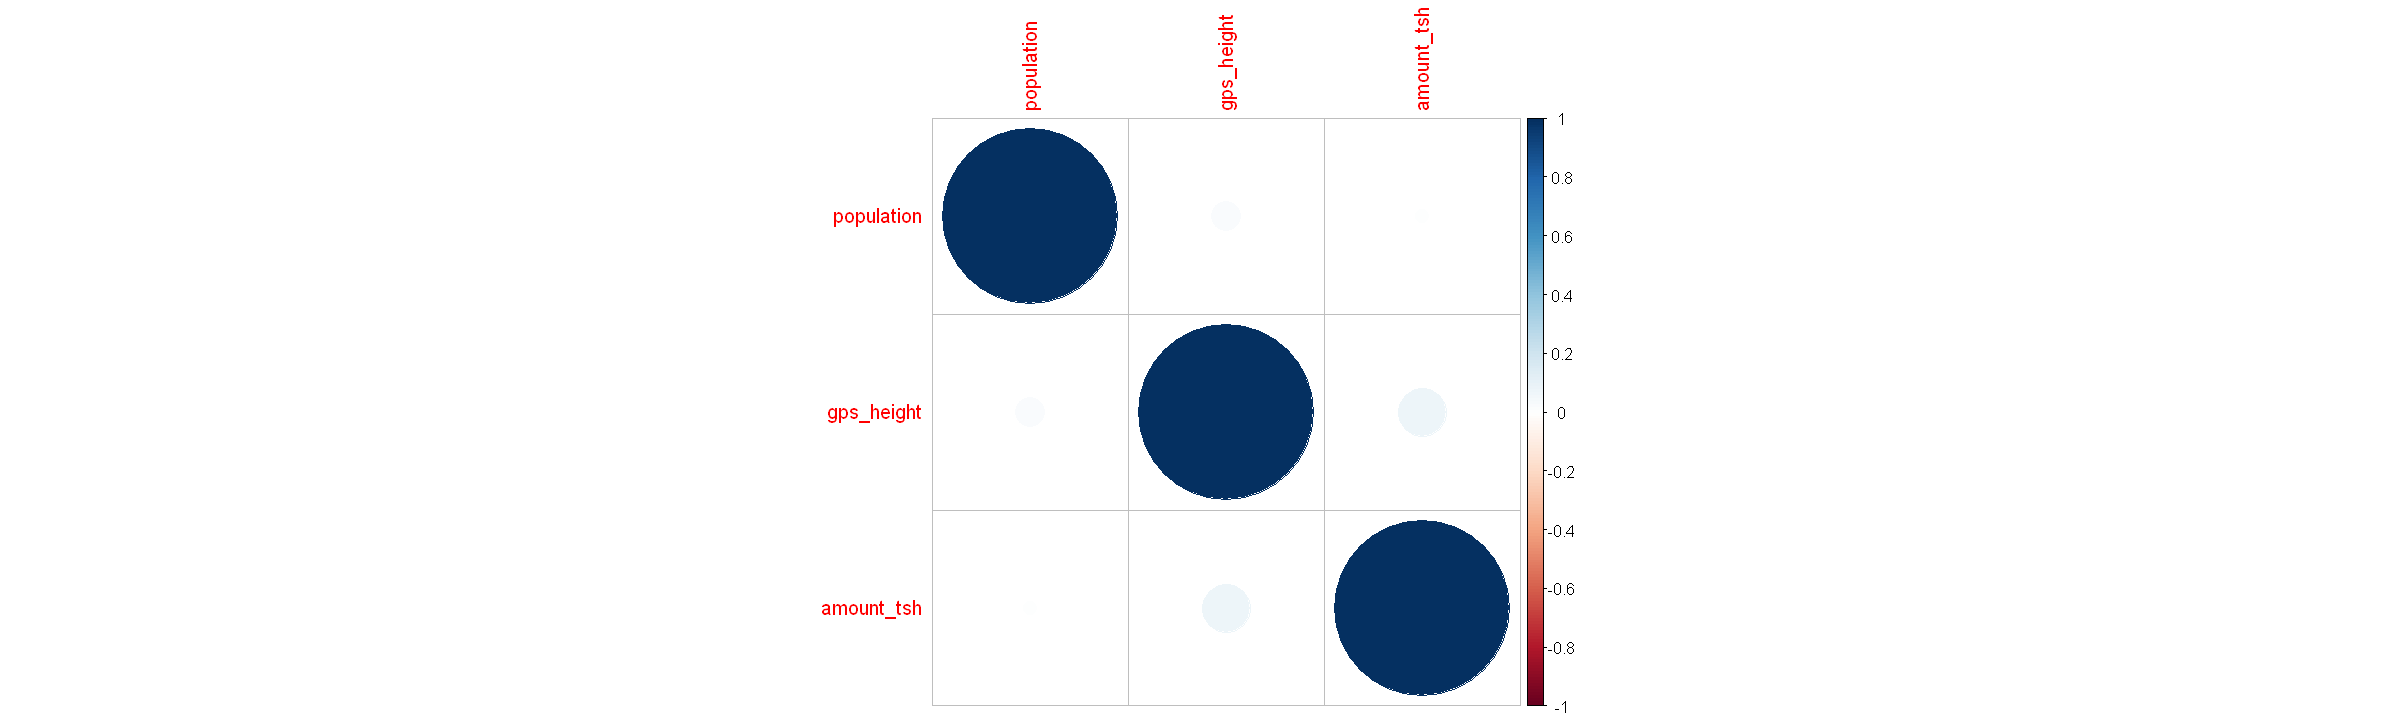

In [32]:
corrplot(cor(training_data_set[,c("population","gps_height","amount_tsh")], method = "pearson"), method="circle")

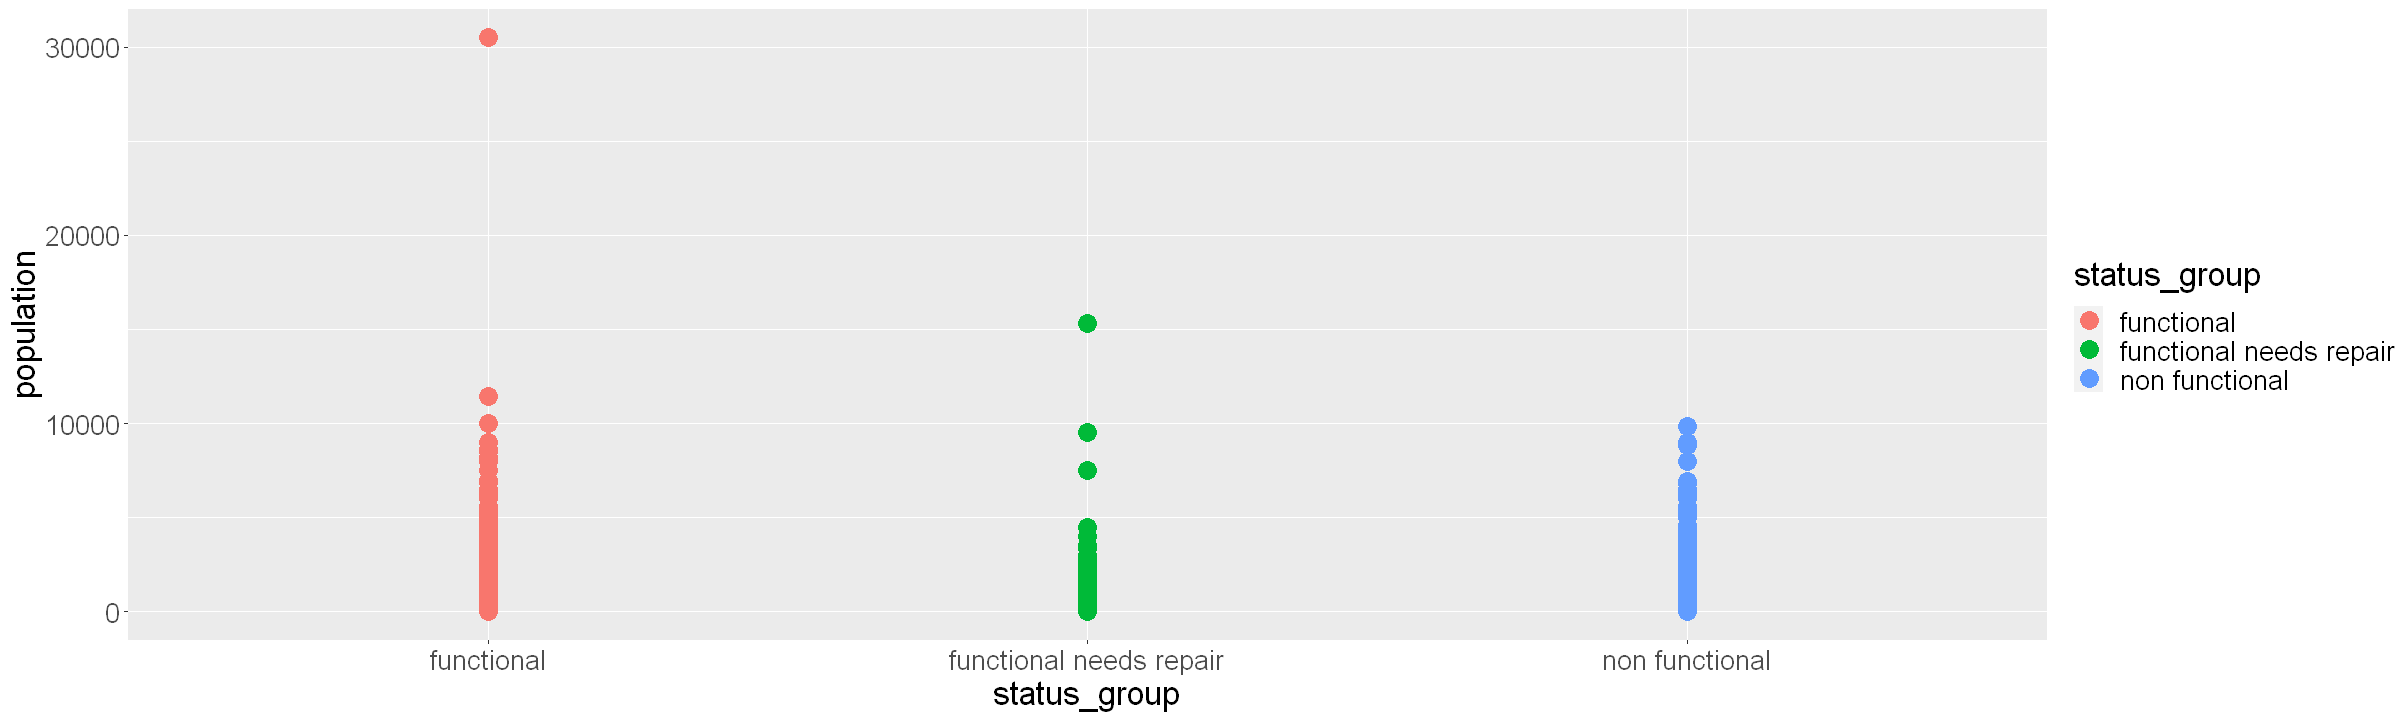

In [33]:
ggplot(training_data_set, aes(x=status_group, y=population,color=status_group)) + geom_point(size=5)+theme(text = element_text(size=20))

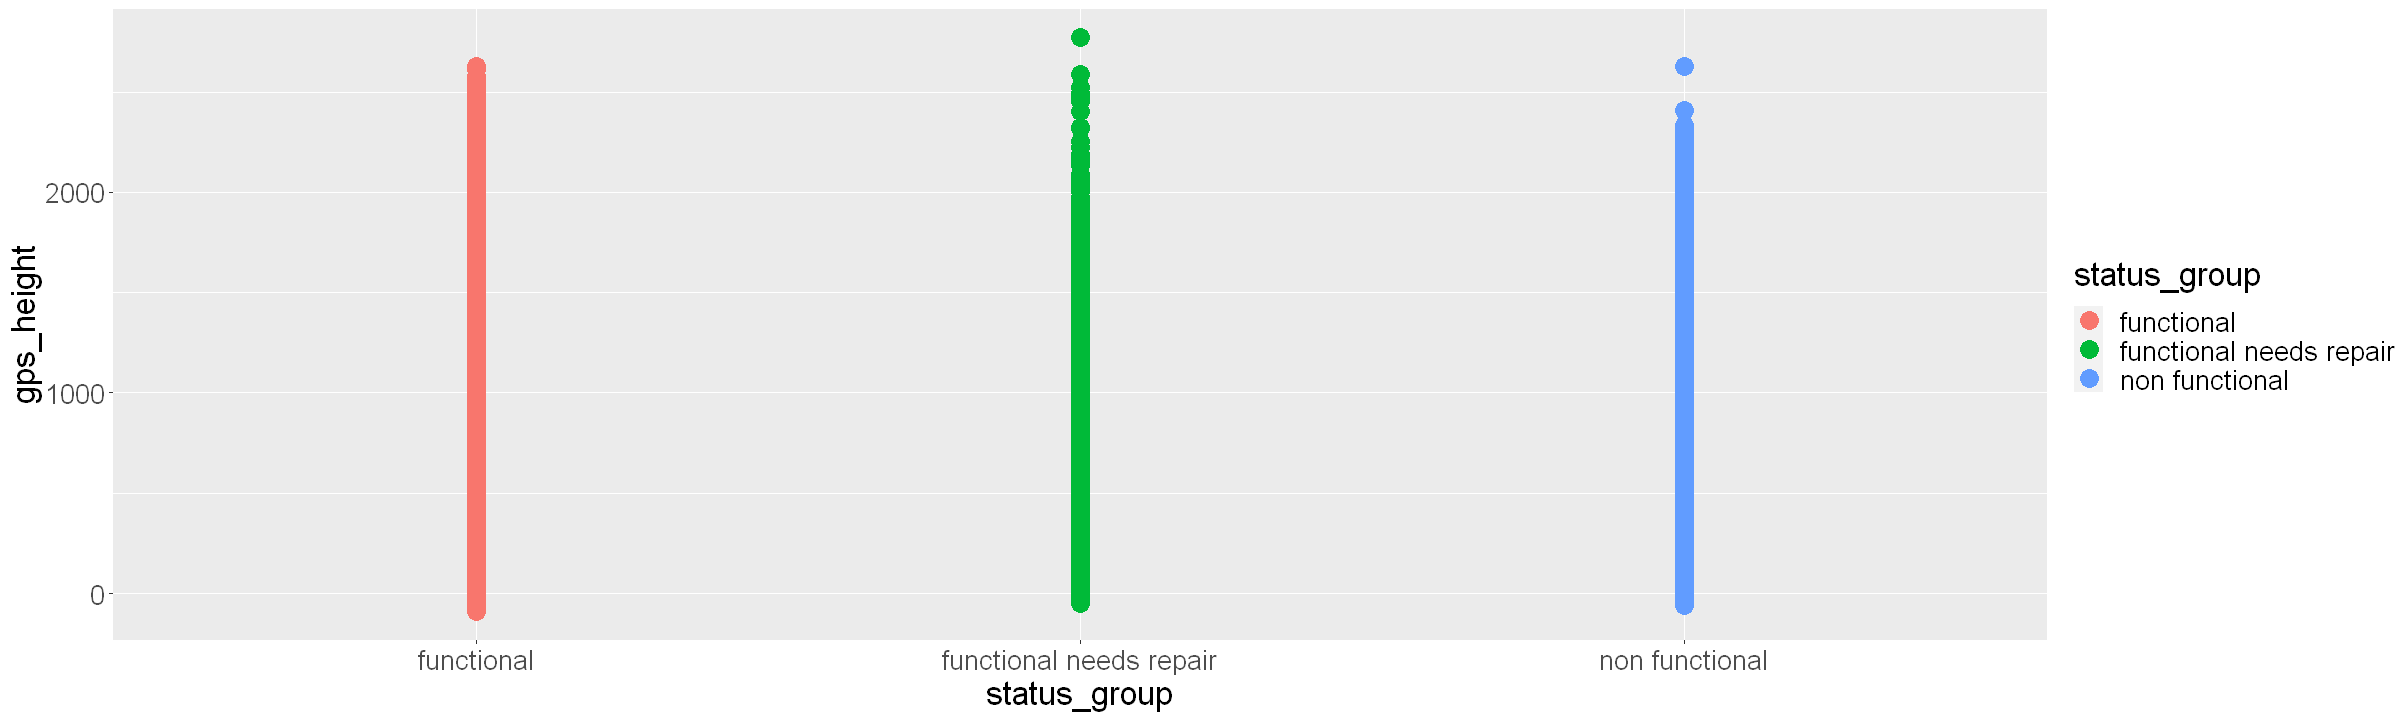

In [34]:
ggplot(training_data_set, aes(x=status_group, y=gps_height,color=status_group)) + geom_point(size=5)+theme(text = element_text(size=20))

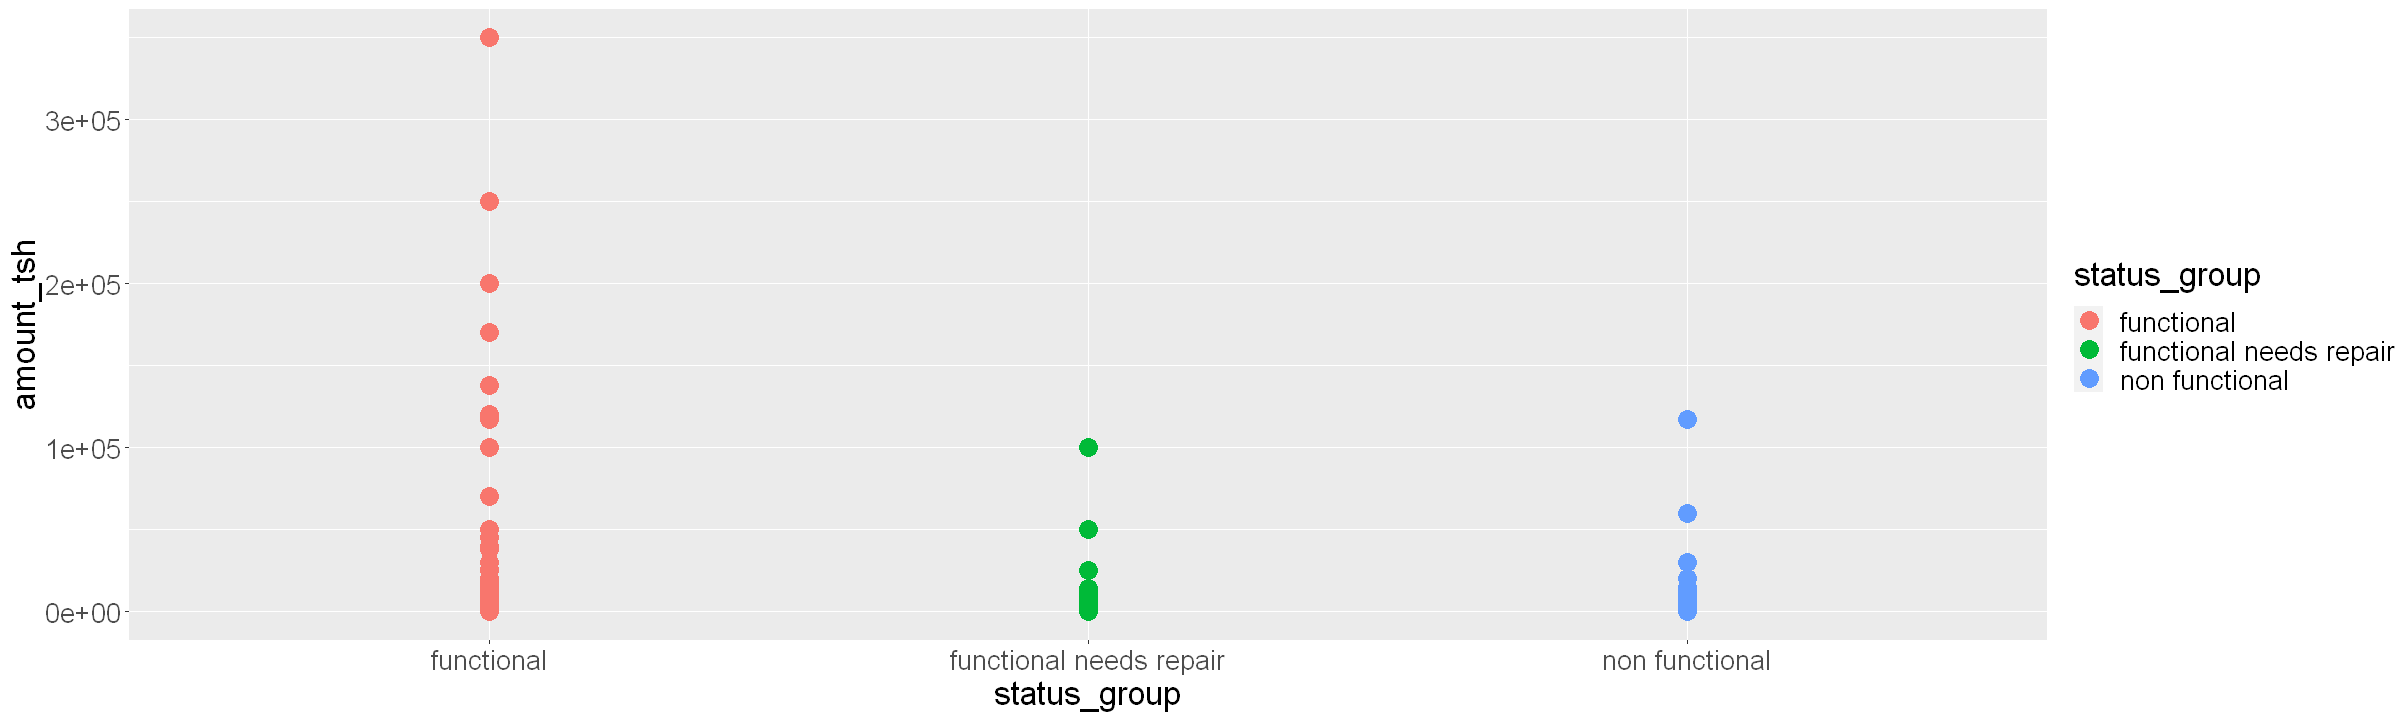

In [35]:
ggplot(training_data_set, aes(x=status_group, y=amount_tsh,color=status_group)) + geom_point(size=5)+theme(text = element_text(size=20))

#### As the amount of water increases in the pump the pump seems to be more functional.

---
#### Conclusion from 6
As we can see from the above correlation matrix none of the three features are highly related. So we keep all of them.

#### 7. We now replace all the missing values from the features. 

In [36]:
names(which(colSums(is.na(training_data_set)) > 0))

[1] "funder"            "subvillage"        "public_meeting"   
[4] "scheme_management" "permit"

---
#### We do it only for scheme_management because we will be eliminating public_meeting and permit as per below charts.

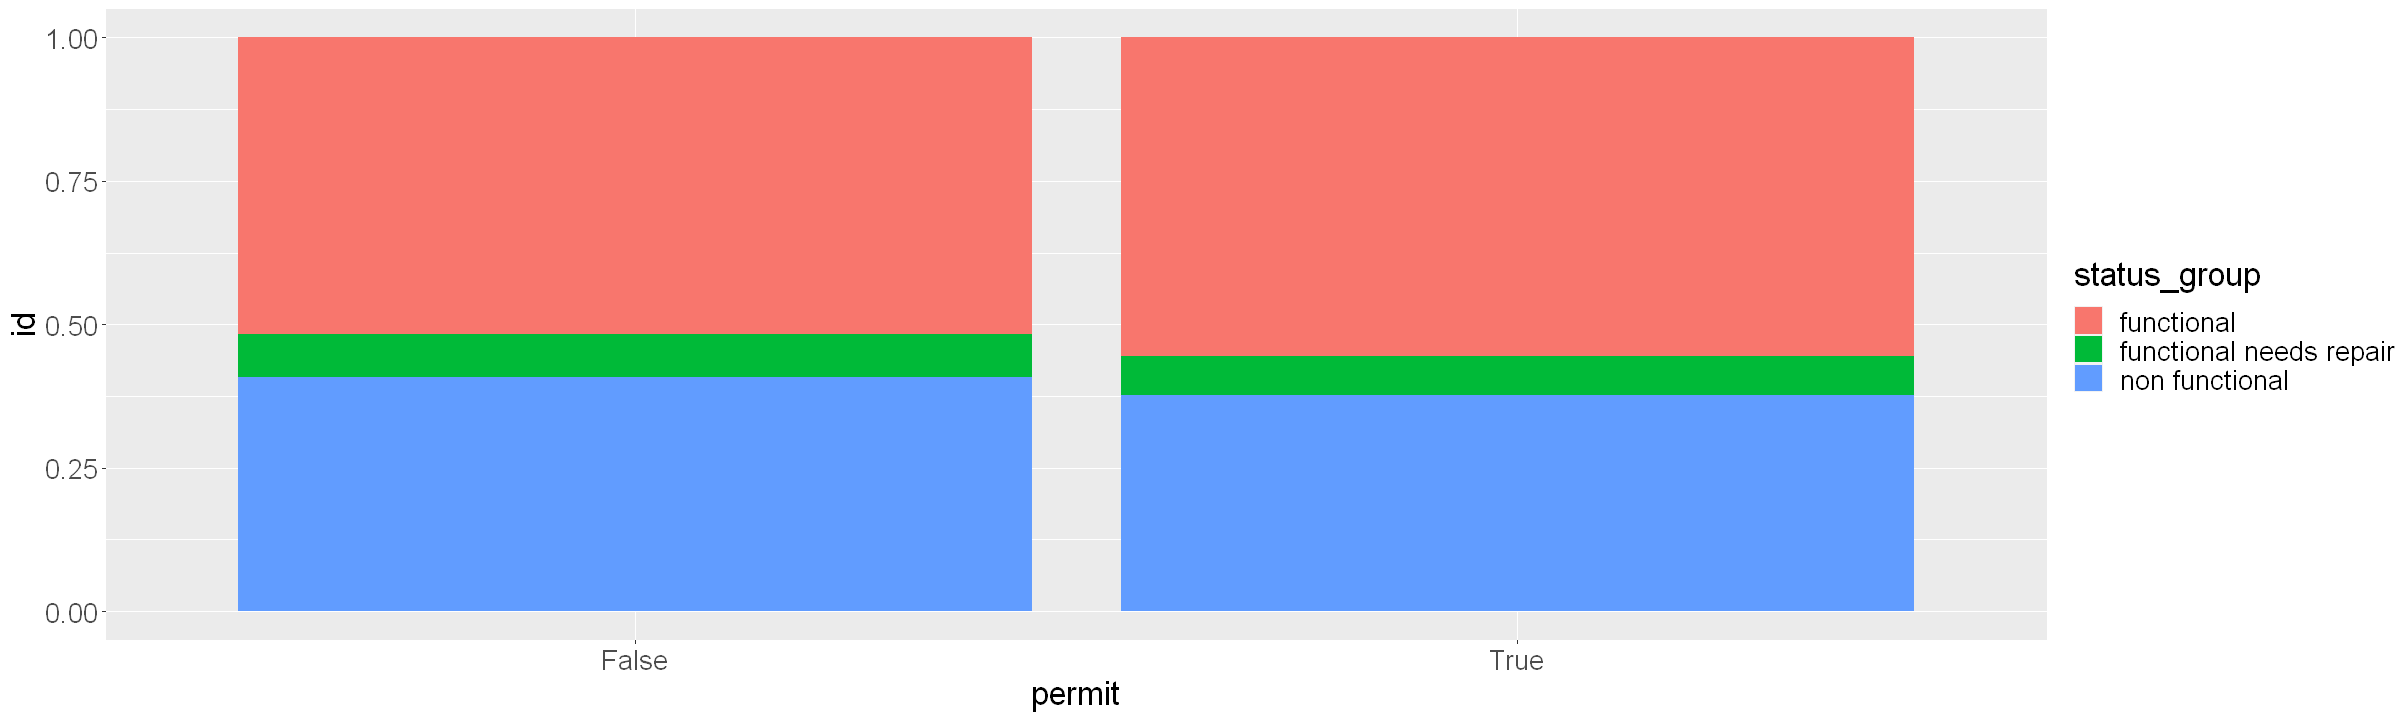

In [37]:
group_by_permit <- aggregate(id~permit+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_permit, aes(fill=status_group, y=id, x=permit)) + 
    geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

---
#### From the above graph we see that permit does not really affect the status of a pump. For both True and False the distribution of pumps based on their functional status continues to be the same. 

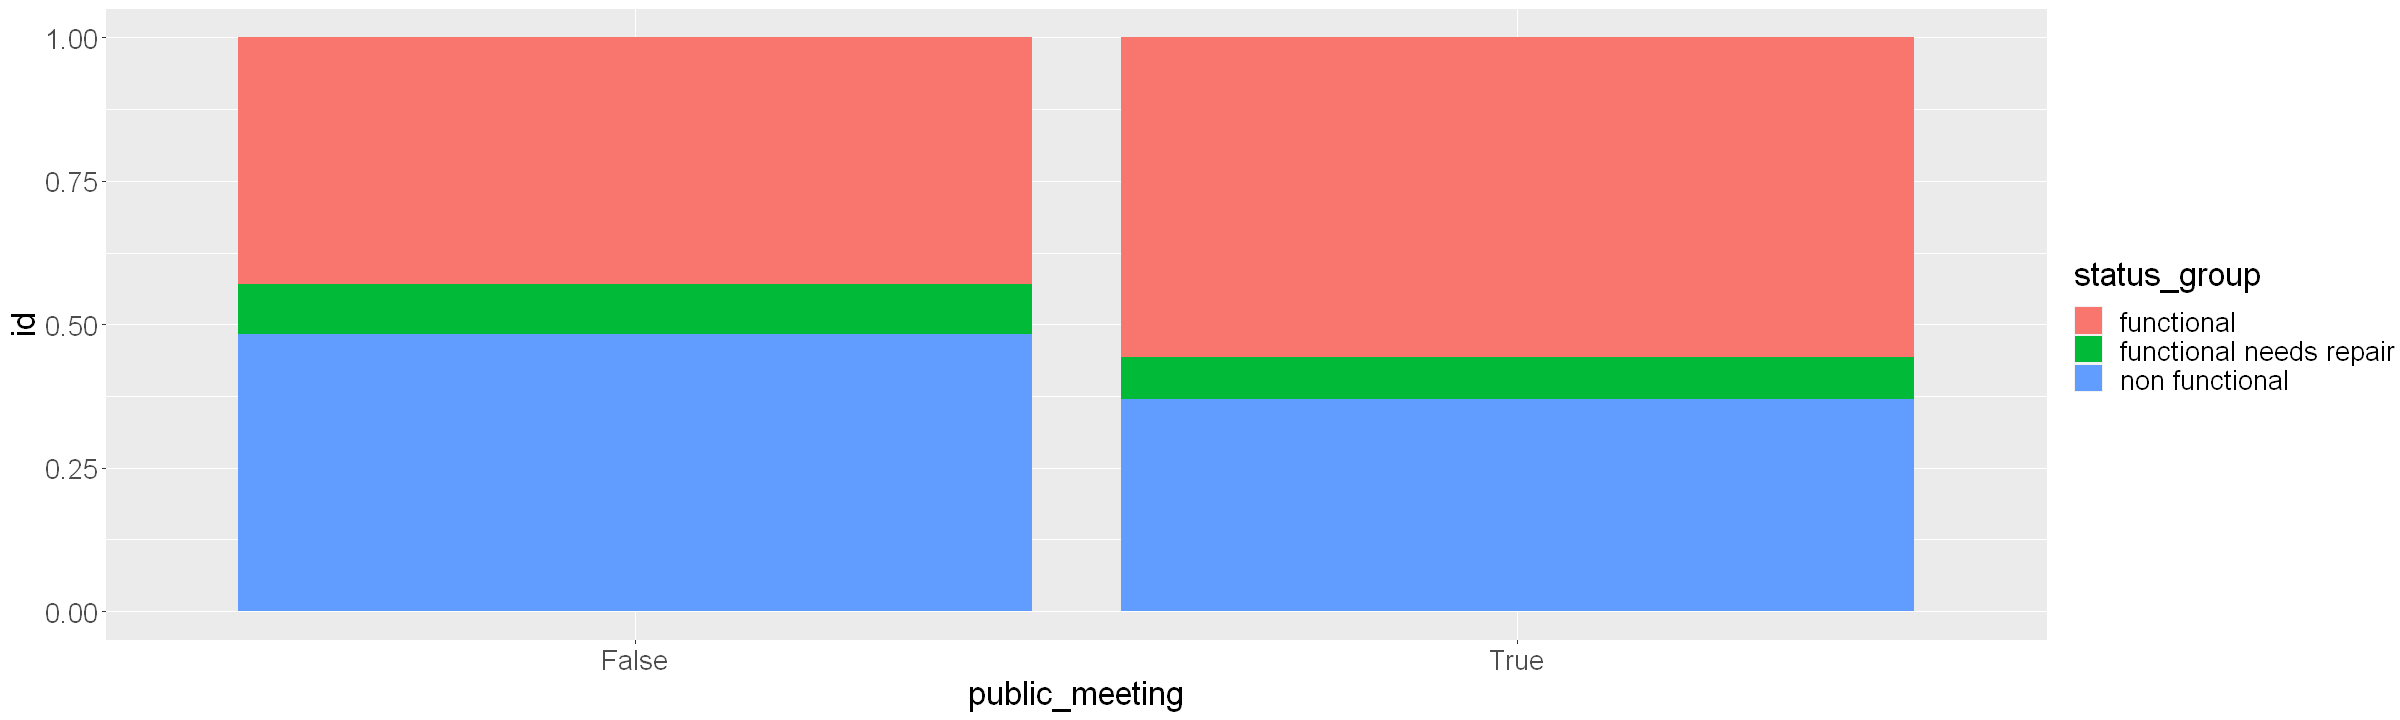

In [38]:
group_by_public_meeting <- aggregate(id~public_meeting+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_public_meeting, aes(fill=status_group, y=id, x=public_meeting)) + 
    geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

---
#### Same as for permit, we observe that public_meeting might not affect the target variable so we can eliminate it

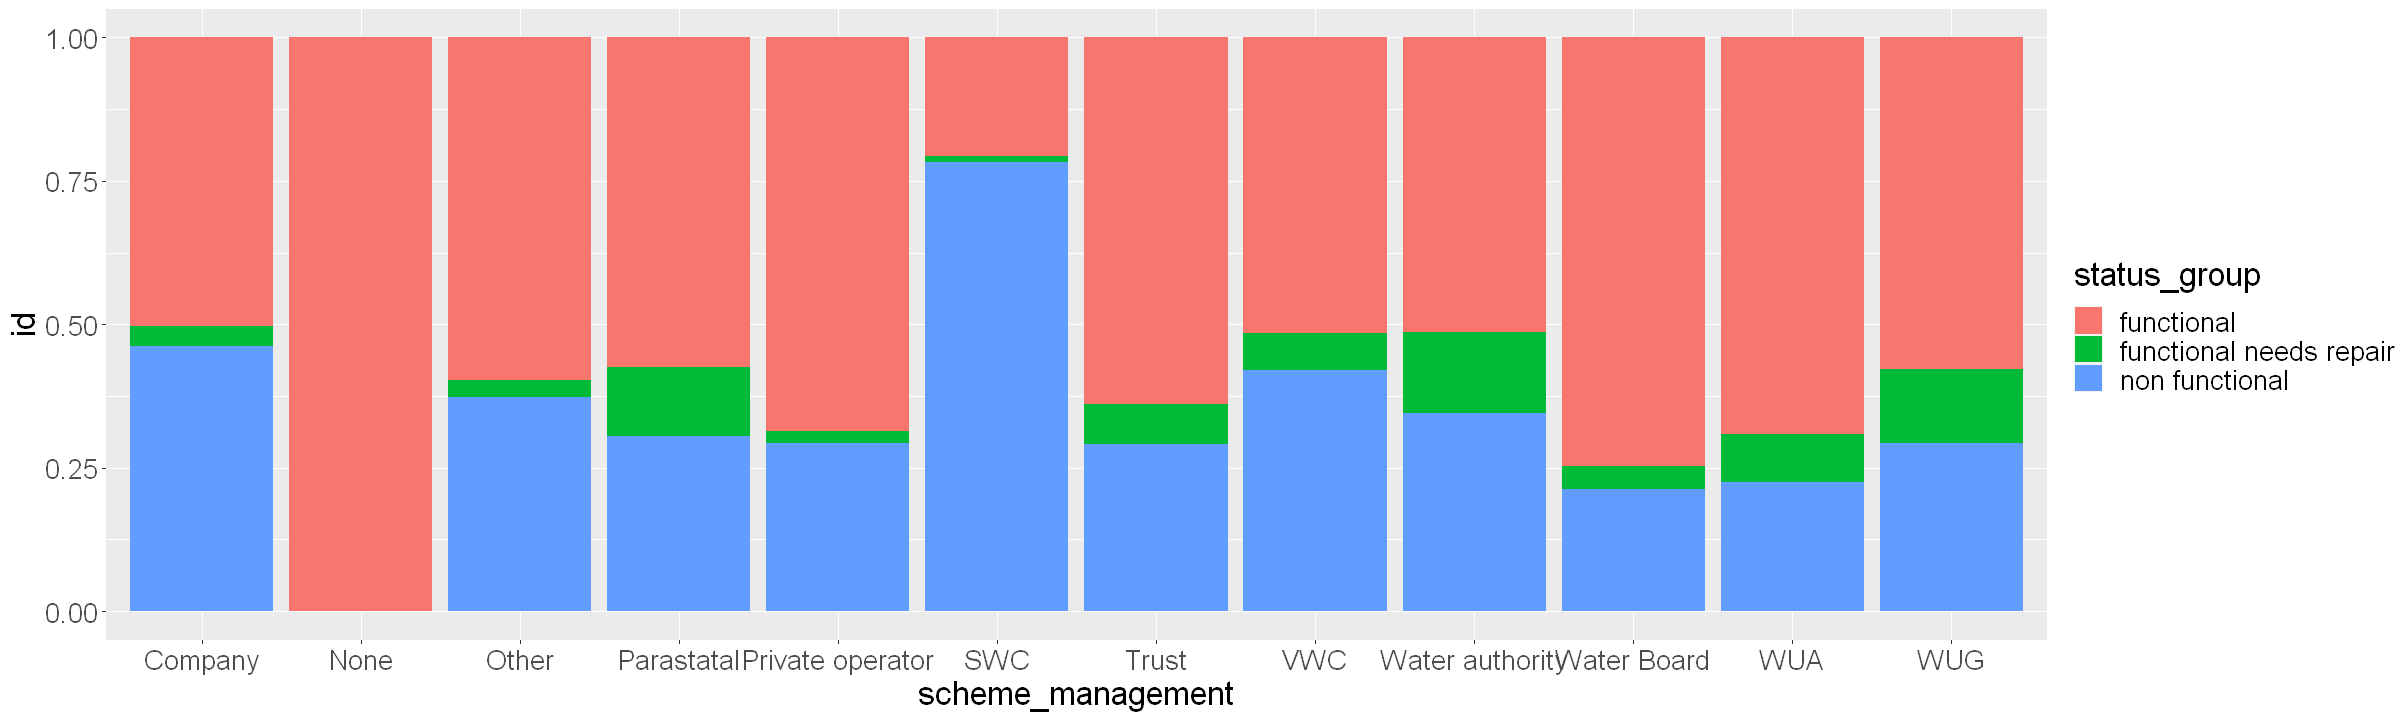

In [39]:
group_by_scheme_management <- aggregate(id~scheme_management+status_group,training_data_set, function(x) length(unique(x)))
# print(group_by_permit)  
options(repr.plot.width=20, repr.plot.height=6)
ggplot(group_by_scheme_management, aes(fill=status_group, y=id, x=scheme_management)) + 
    geom_bar(position="fill", stat="identity")+theme(text = element_text(size=20))

---
#### Based on the scheme the functionality varies. This is observed from the stacked percentage chart above. Also we have a "Other" category. We can map all missing values to it.

In [40]:
training_data_set["scheme_management"][is.na(training_data_set["scheme_management"])]<- "Other"
training_data_set <- subset(training_data_set,select=-c(permit,public_meeting))

#### 8. Since now we have our list of features we try and reduce the levels in our categorical variables.

In [41]:
unique_value_list <- apply(training_data_set, 2, function(x) length(unique(x)))
print(sort(unique_value_list))

         status_group        quantity_group         quality_group 
                    3                     5                     6 
waterpoint_type_group extraction_type_class               payment 
                    6                     7                     7 
                basin                source     scheme_management 
                    9                    10                    12 
           management         district_code                region 
                   12                    20                    21 
          region_code                   age            amount_tsh 
                   27                    54                    98 
                  lga            population                funder 
                  125                  1048                  1897 
                 ward            gps_height            subvillage 
                 2092                  2428                 19287 
            longitude              latitude                   

---
#### We replace the missing values from funder with NA

In [42]:
training_data_set["funder"][is.na(training_data_set["funder"])] <- "Other"
# print((unique(training_data_set["funder"])))

---
#### 9. Since we have latitude and longitude along with region we can remove the rest of the geographical features.

In [43]:
training_data_set <- subset(training_data_set, select = -c(subvillage,region_code,district_code,lga,ward,region))
print(colnames(training_data_set))

 [1] "id"                    "amount_tsh"            "funder"               
 [4] "gps_height"            "longitude"             "latitude"             
 [7] "basin"                 "population"            "scheme_management"    
[10] "extraction_type_class" "management"            "payment"              
[13] "quality_group"         "quantity_group"        "source"               
[16] "waterpoint_type_group" "status_group"          "age"                  


#### 10. Next we replace all blank numerical data with their corresponding median values

In [44]:
training_data_set["amount_tsh"] <- lapply((training_data_set["amount_tsh"]),as.numeric)
training_data_set["amount_tsh"][is.na(training_data_set["amount_tsh"])]<- mean((training_data_set$amount_tsh))
training_data_set["gps_height"][is.na(training_data_set["gps_height"])]<- mean(as.numeric(training_data_set$gps_height))
training_data_set["latitude"][is.na(training_data_set["latitude"])]<- mean(as.numeric(training_data_set$latitude))
training_data_set["longitude"][is.na(training_data_set["longitude"])]<- mean(as.numeric(training_data_set$longitude))
# 0 longitude probably implies missing values
training_data_set$longitude[training_data_set$longitude==0]<-median(training_data_set$longitude)
# print(unique(training_data_set["public_meeting"]))


#### 11. We remove id column since that is unique for every row. Also we remove the count column that we generated above

In [45]:
# remove_column <- "id"

training_data_set <- subset(training_data_set,select=-c(id))
print(colnames(training_data_set))

 [1] "amount_tsh"            "funder"                "gps_height"           
 [4] "longitude"             "latitude"              "basin"                
 [7] "population"            "scheme_management"     "extraction_type_class"
[10] "management"            "payment"               "quality_group"        
[13] "quantity_group"        "source"                "waterpoint_type_group"
[16] "status_group"          "age"                  


#### 12. We factorize the target variable to be able to use it in our classification models next.

In [46]:
training_data_set$status_group<-as.factor(training_data_set$status_group)
unique(training_data_set$status_group)

[1] non functional          functional              functional needs repair
Levels: functional functional needs repair non functional

In [47]:
dim(training_data_set)

[1] 59391    17

## Task 2 - Model Selection and Implementation

### Explanation
The first and foremost model that we decided to impelement is Random Forest. Random Forest is an ensemble technique which means that it uses bootstrapping and bagging techniques to improve its predictions. Out of the given list Random Forest is the one that can handle categorical variables directly so we could obtain a baseline accuracy from this model directly from our selected features. Also Random Forests work well with large datasets and large features.

## 1. Random Forest

#### Tuning of hyperparameters - ntree

We tried executing random forest model with different parameters to understand how well the model performs. This part of the code has been commented to reduce the execution time. After running all models we decided to choose ntree as 250 and mtry as 3. Please uncomment the code in order to execute it (Cells 37-43).

In [48]:
# # with default parameters ntree = 500
# model_1_rf = randomForest(status_group~., data = training_data_set, importance = TRUE)

In [49]:
# print(model_1_rf)


Call:
 randomForest(formula = status_group ~ ., data = training_data_set,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.74%
Confusion matrix:
                        functional functional needs repair non functional
functional                   29117                     667           2471
functional needs repair       2316                    1398            603
non functional                4783                     291          17745
                        class.error
functional               0.09728724
functional needs repair  0.67616400
non functional           0.22235856


In [50]:
# model_2_rf = randomForest(status_group~., data = training_data_set, importance = TRUE,ntree=100)
# print(model_2_rf)


Call:
 randomForest(formula = status_group ~ ., data = training_data_set,      importance = TRUE, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 19.07%
Confusion matrix:
                        functional functional needs repair non functional
functional                   29012                     709           2534
functional needs repair       2324                    1399            594
non functional                4858                     305          17656
                        class.error
functional                0.1005426
functional needs repair   0.6759324
non functional            0.2262588


In [51]:
# model_3_rf = randomForest(status_group~., data = training_data_set, importance = TRUE,ntree=200)
# print(model_3_rf)


Call:
 randomForest(formula = status_group ~ ., data = training_data_set,      importance = TRUE, ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.85%
Confusion matrix:
                        functional functional needs repair non functional
functional                   29046                     680           2529
functional needs repair       2323                    1390            604
non functional                4763                     298          17758
                        class.error
functional               0.09948845
functional needs repair  0.67801714
non functional           0.22178886


---
#### Conclusion from hyperparameter tuning
We can conclude that for very few number of tress the error rate is high. As the number of trees are less there will be more bias in the data because all not rows will be taken into consideration while generating the samples. As the number of tress increase the error rate decreases but after a certain point it brings only a marginal improvement. So we choose an optimum point where error rate is low and so is execution time.

#### Tuning of hyperparameter - mtry

In [52]:
# model_4_rf = randomForest(status_group~., data = training_data_set, importance = TRUE,ntree=250,mtry=6)
# print(model_4_rf)


Call:
 randomForest(formula = status_group ~ ., data = training_data_set,      importance = TRUE, ntree = 250, mtry = 6) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 6

        OOB estimate of  error rate: 18.89%
Confusion matrix:
                        functional functional needs repair non functional
functional                   28784                     799           2672
functional needs repair       2204                    1476            637
non functional                4557                     350          17912
                        class.error
functional                0.1076112
functional needs repair   0.6580959
non functional            0.2150401


In [53]:
# model_5_rf = randomForest(status_group~., data = training_data_set, importance = TRUE,ntree=250,mtry=12)
# print(model_5_rf)


Call:
 randomForest(formula = status_group ~ ., data = training_data_set,      importance = TRUE, ntree = 250, mtry = 12) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 12

        OOB estimate of  error rate: 19.44%
Confusion matrix:
                        functional functional needs repair non functional
functional                   28373                     986           2896
functional needs repair       2147                    1517            653
non functional                4451                     412          17956
                        class.error
functional                0.1203534
functional needs repair   0.6485986
non functional            0.2131119


In [54]:
# model_6_rf = randomForest(status_group~., data = training_data_set, importance = TRUE,ntree=250,mtry=1)
# print(model_6_rf)


Call:
 randomForest(formula = status_group ~ ., data = training_data_set,      importance = TRUE, ntree = 250, mtry = 1) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 1

        OOB estimate of  error rate: 22.94%
Confusion matrix:
                        functional functional needs repair non functional
functional                   30612                      87           1556
functional needs repair       3612                     217            488
non functional                7846                      35          14938
                        class.error
functional               0.05093784
functional needs repair  0.94973361
non functional           0.34537009


In [55]:
model_final_rf = randomForest(status_group~., data = training_data_set, importance = TRUE,ntree=250,mtry=6)
model_final_rf


Call:
 randomForest(formula = status_group ~ ., data = training_data_set,      importance = TRUE, ntree = 250, mtry = 6) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 6

        OOB estimate of  error rate: 18.91%
Confusion matrix:
                        functional functional needs repair non functional
functional                   28794                     819           2642
functional needs repair       2214                    1478            625
non functional                4570                     359          17890
                        class.error
functional                0.1073012
functional needs repair   0.6576326
non functional            0.2160042

In [56]:
accuracy_rf <- sum(diag(model_final_rf$confusion))/sum(model_final_rf$confusion)*100
accuracy_rf
model_final_rf$confusion

[1] 81.09176

,functional,functional needs repair,non functional,class.error
functional,28794,819,2642,0.1073012
functional needs repair,2214,1478,625,0.6576326
non functional,4570,359,17890,0.2160042


In [57]:
print("Recall Per Class - Random Forest")
recall_rf <- calc_recall(model_final_rf$confusion)
print(recall_rf)

[1] "Recall Per Class - Random Forest"
[1] 89.26988 34.23674 78.39958


In [58]:
print("Precision Per Class - Random Forest")
precision_rf <- calc_precision(model_final_rf$confusion)
print(precision_rf)

[1] "Precision Per Class - Random Forest"
[1] 80.93204 55.64759 84.55830


In [59]:
print("F1 - SCore - Random Forest")
f1_rf <- calc_f1(precision_rf,recall_rf)
print(f1_rf)

[1] "F1 - SCore - Random Forest"
[1] 84.89673 42.39208 81.36256


-----
From the class error it is clear that the maximum error is in predicting "functional needs repair". This is because it is the class with the lowest distribution (imbalance in data). And that is also visible in the precision and recall for "functional needs repair"

---
Increasing the value of mtry and decreasing it cause an increase in the error rate. So we choose the value 6 for which we get the optimum rate. Using mtry=6 and ntree =250 we will generate the predictions.

------
Getting feature importance from random forest

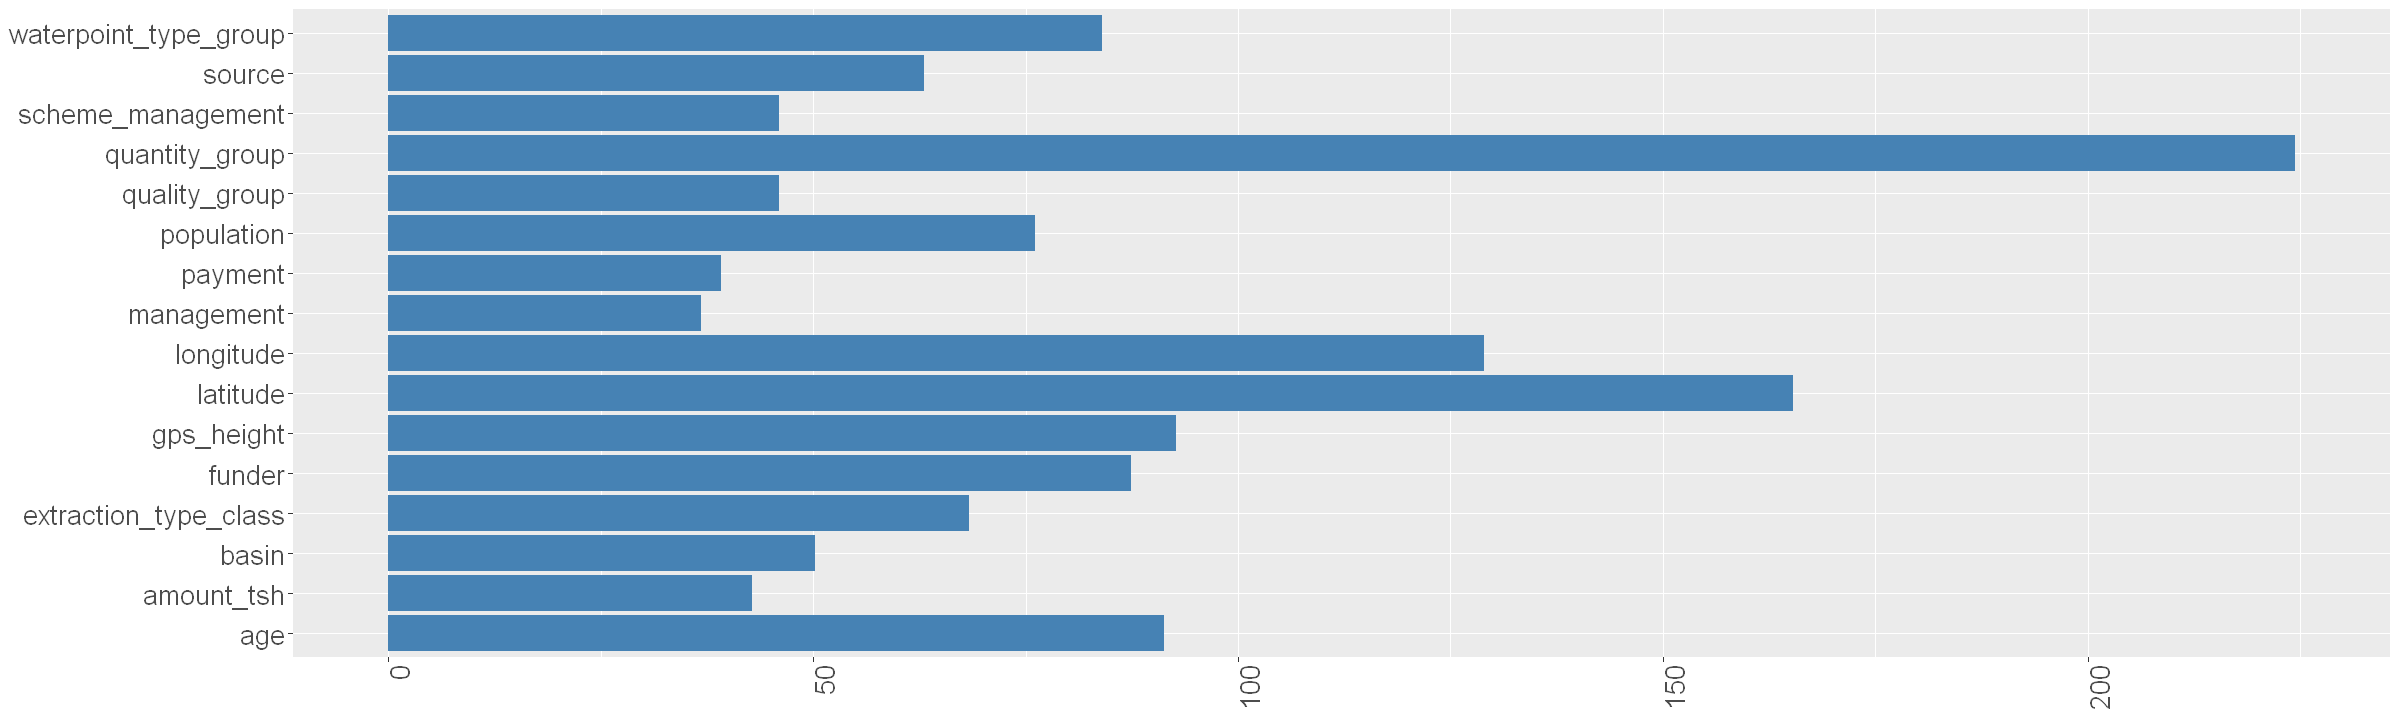

In [60]:
feature_importance_rf <- data.frame(colName = colnames(subset(training_data_set,select=-status_group)),
                                   importance = importance(model_final_rf,1)
                                   )
options(repr.plot.width=20, repr.plot.height=6)
ggplot(feature_importance_rf[,1:2], aes(y=feature_importance_rf[,2], x=feature_importance_rf[,1])) + 
   geom_bar(stat="identity",fill="steelblue")+coord_flip()+theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1),axis.title.x = element_blank(),axis.title.y = element_blank()) 

----
Each feature that we have selected gives a good score in random forest.

### For the next models categorical variables need to be encoded

### Encoding for string columns

In [61]:
#creating a copy of categorical features
training_data_set_without_encoded <- data.frame(training_data_set)

---
#### From the above data pre-processing it is clear that the levels of "funder" variable need to be reduced. So we count the number of instances per funder and match all those occuring less than 500 times to Other

In [62]:
aggregate_funder_count<-data.frame(aggregate(.~funder,training_data_set, function(x)length(x) ))
aggregate_funder_count <- subset(aggregate_funder_count,select=c(1,2))                                           
colnames(aggregate_funder_count)[2]<-"count_funder"
                                            
aggregate_funder_count<- subset(aggregate_funder_count,select=c(funder,count_funder))
training_data_set <- merge(x=training_data_set, y=aggregate_funder_count,by="funder",all=TRUE)
training_data_set["funder"][training_data_set["count_funder"]<500] <- "Other"
training_data_set <- subset(training_data_set,select=-count_funder)                                             
training_data_set_reduced_funder <-  data.frame(training_data_set)                              


In [63]:
# Function which performs Ordinal Encoding
encode_ordinal <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}
 
# Performing Ordinal Encoding on two features
training_data_set[["quality_group"]] <- encode_ordinal(training_data_set[["quality_group"]])
training_data_set[["quantity_group"]] <- encode_ordinal(training_data_set[["quantity_group"]])
 
# Viewing the data_set to check if the encoding took place.
head(training_data_set)
 
# Before performing One-Hot encoding , we have to factorize the features which are specifically strings.
columns <- c("funder","basin","payment","scheme_management","extraction_type_class","management","source","waterpoint_type_group")
training_data_set[columns] <- lapply(training_data_set[columns],as.factor)
 
# Performing One hot Encoding and assigning it to a variable
dv <- caret::dummyVars("~ funder + basin + payment + scheme_management + extraction_type_class + management + source + waterpoint_type_group", data = training_data_set)
training_data_set_encoded <- data.frame(predict(dv, newdata = training_data_set))
 

# Removing the Encoded features
training_data_set <- subset(training_data_set, select = -c(funder,basin,payment,scheme_management,extraction_type_class,source,waterpoint_type_group,source,management))
 
# Copying the values from the encoded data frame into the existing training_data_set.
training_data_set <- cbind(training_data_set,training_data_set_encoded)

,funder,amount_tsh,gps_height,longitude,latitude,basin,population,scheme_management,extraction_type_class,management,payment,quality_group,quantity_group,source,waterpoint_type_group,status_group,age
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>
1,0,0,-50,39.39950,-6.865737,Wami / Ruvu,90,SWC,motorpump,other - school,never pay,1,1,machine dbh,communal standpipe,non functional,13
2,0,50,-7,39.19571,-6.903115,Wami / Ruvu,150,Private operator,submersible,private operator,pay per bucket,2,2,machine dbh,communal standpipe,functional,3
3,0,100,90,39.13444,-6.700663,Wami / Ruvu,256,VWC,submersible,vwc,pay per bucket,2,3,river,communal standpipe,functional,3
4,0,50,63,39.12356,-6.919401,Wami / Ruvu,120,Private operator,submersible,private operator,pay per bucket,1,2,machine dbh,communal standpipe,functional,3
5,0,50,-12,39.35191,-6.863978,Wami / Ruvu,30,WUG,submersible,wug,pay per bucket,1,3,machine dbh,communal standpipe,functional,13
6,0,0,95,39.15866,-6.832383,Wami / Ruvu,120,WUG,submersible,wug,never pay,2,2,machine dbh,communal standpipe,non functional,3


### Explanation
The next model that we choose is KNN. KNN is a good model for multiclassification. It provides good performance for large datasets. It is one of the simplest classification algorithms.K-nearest neighbours is a non-parametric classification and regression technique. KNN's basic logic is to look around your neighbourhood, assume the test datapoint is identical to them, and extract the result. 

We search for k neighbours and make a prediction using KNN. KNN classification uses majority voting over the k closest datapoints, while KNN regression uses the mean of the k closest datapoints as the output. We choose odd numbers as k as a rule of thumb.

We chose KNN because it is an easy and simple machine learning model and has few hyperparameters to tune.

## 2. KNN

Splitting the test and train dataset

In [64]:
df1 <- as.data.frame(sapply(training_data_set, as.numeric)) # Converting the complete dataset into numeric type.
p <- 0.8 # Using only 80% for training and the rest 20% for validation.
train_index <- sample.int(nrow(df1),nrow(df1)*p) # Generating random integers for 80% of the data set
data_train <- as.data.frame(df1[train_index,]) # New data frame with the 80% random indices for training
data_val <- as.data.frame(df1[-train_index,]) # New data frame with the rest 20% random indices for testing
d_label <- data_train$status_group # label which is used for classification

### Tuning of hyperparameter - count of seed k

Applying different values for the seeds to check how the accuracy score will differ (Hyperparameter Tuning). This part of the code has been commented to reduce the execution time of the report. Please uncomment below cell to execute it. 

In [65]:
# for (i in 3:6) {
#   set.seed(5) # For reproducibility purpose because we are using random indices.
#   Ypred_knn = knn(train = data_train , test = data_val, cl = d_label, k = i) # perform the KNN prediction
#   confusion_matrix <- table(data_val$status_group,Ypred_knn) # Confusion Matrix of the prediction
#   accuracy <- ((sum(diag(confusion_matrix)))/sum(confusion_matrix))*100 # Printing the accuracy of the model
#   Ypred_knn <- as.numeric(as.character(Ypred_knn)) # Converting the prediction to numeric
#   cross_validation <-data.frame(RMSE = RMSE(Ypred_knn,data_train$status_group),MAE= MAE(Ypred_knn,data_train$status_group)) # Performing Cross Validation
#   print((paste0('The accuracy of the KNN model when number of neighbors = ',i,' is ', accuracy ,' % '))) # Printing the result
#   print(cross_validation) # Printing the result
# }

Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"
Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"


[1] "The accuracy of the KNN model when number of neighbors = 3 is 76.5721020287903 % "
      RMSE       MAE
1 1.344105 0.9621148


Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"
Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"


[1] "The accuracy of the KNN model when number of neighbors = 4 is 76.2353733479249 % "
      RMSE       MAE
1 1.348123 0.9641354


Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"
Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"


[1] "The accuracy of the KNN model when number of neighbors = 5 is 76.7909756713528 % "
      RMSE       MAE
1 1.344402 0.9587473


Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"
Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"


[1] "The accuracy of the KNN model when number of neighbors = 6 is 76.647865981985 % "
      RMSE       MAE
1 1.347123 0.9613992


------
#### Conclusion from hyperparameter tuning
After looking at various values of k from the above code, we see that the maximum accuracy is obtained from k=5 and so we use that for the final implementation.

In [66]:
set.seed(5) # For reproducibility purpose because we are using random indices.
Ypred_knn = knn(train = data_train , test = data_val, cl = d_label, k = 5) # perform the KNN prediction
confusion_matrix <- table(data_val$status_group,Ypred_knn) # Confusion Matrix of the prediction
accuracy <- ((sum(diag(confusion_matrix)))/sum(confusion_matrix))*100 # Printing the accuracy of the model
Ypred_knn <- as.numeric(as.character(Ypred_knn)) # Converting the prediction to numeric
cross_validation <-data.frame(RMSE = RMSE(Ypred_knn,data_train$status_group),MAE= MAE(Ypred_knn,data_train$status_group)) # Performing Cross Validation
print(confusion_matrix)
print((paste0('The accuracy of the KNN model when number of neighbors = 5',' is ', accuracy ,' % '))) # Printing the result
print(cross_validation) # Printing the result

Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"
Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"


   Ypred_knn
       1    2    3
  1 5473   94  898
  2  351  342  168
  3 1160   86 3307
[1] "The accuracy of the KNN model when number of neighbors = 5 is 76.7909756713528 % "
      RMSE       MAE
1 1.344402 0.9587473


In [67]:
print("Recall Per Class  - KNN")
recall_knn <- calc_recall(confusion_matrix)
print(recall_knn)

[1] "Recall Per Class  - KNN"
[1] 84.65584 39.72125 72.63343


In [68]:
print("Precision Per Class - KNN")
precision_knn <- calc_precision(confusion_matrix)
print(precision_knn)

[1] "Precision Per Class - KNN"
[1] 78.36483 65.51724 75.62314


In [69]:
print("F1 Per Class - KNN")
f1_knn <- calc_f1(precision_knn,recall_knn)
print(f1_knn)

[1] "F1 Per Class - KNN"
[1] 81.38895 49.45770 74.09814


A decision tree is a type of machine learning algorithm that divides data into groups. Partitioning begins with a binary split and continues until no further splits are possible. Various branches of varying lengths are developed. A decision tree's aim is to condense the training data into the smallest possible tree.

A decision tree forces all possible consequences of a decision to be considered, and it tracks each direction to a conclusion. It generates a detailed overview of the implications along each branch and defines decision nodes that need additional investigation.

Decision trees are fast executors. However they do not work well with imbalanced data as observed below.

## 3. Decision Tree

### For decision trees also, we tried executing the same dataset as for Random Forest but it takes too long to execute. So we have reduced the number of values for the funder value and mapped all funders with less than 500 observations as Other

In [70]:
# generate a random list of index
shuffle_index <- sample(1:nrow(training_data_set_reduced_funder))

# shuffle the dataset
training_data_set_dt <- training_data_set[shuffle_index, ]

In [71]:
# create a function to split the data set to train and test parts
create_train_test <- function(data, size = 0.8, train = TRUE) {
    n_row = nrow(data)
    total_row = size * n_row
    train_sample <- 1: total_row
    if (train == TRUE) {
        return (data[train_sample, ])
    } else {
        return (data[-train_sample, ])
    }
}

In [72]:
# create train and test data sets and check their dimensions
data_train <- create_train_test(training_data_set_dt, 0.8, train = TRUE)
data_test <- create_train_test(training_data_set_dt, 0.8, train = FALSE)
dim(data_train) 
dim(data_test)

[1] 47512    92

[1] 11879    92

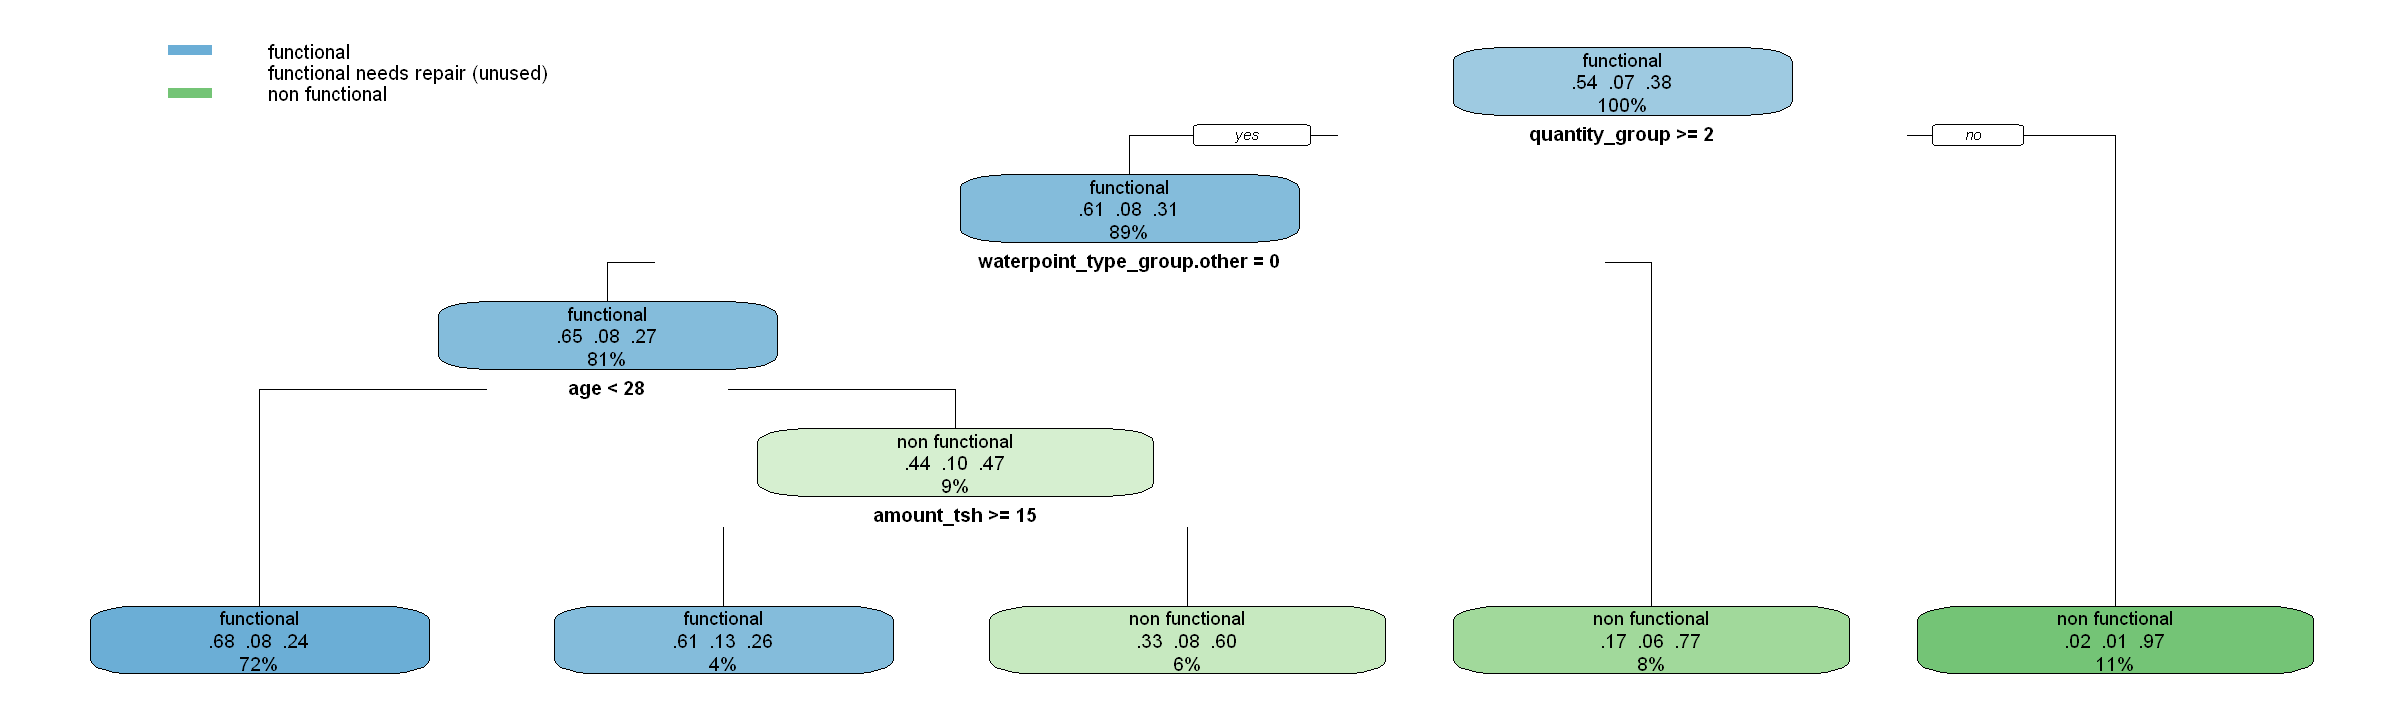

In [73]:
# Build the model
fit <- rpart(status_group~., data = data_train, method = 'class')
rpart.plot(fit, extra = 104, varlen = 0)

In [74]:
# function to get the accuracy
accuracy <- function(fit) {
    predict_unseen <- predict(fit, data_test, type = 'class')
    table_mat <- table(data_test$status_group, predict_unseen)
    accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
    accuracy_Test
}

In [75]:
# make a prediction from test set
predict_status <-predict(fit, data_test, type = 'class')

# accuracy of test data set
print(paste('Accuracy for test', accuracy(fit)*100))


[1] "Accuracy for test 70.3678760838454"


In [76]:
confusion_matrix_decision_tree <- table(data_test$status_group,predict_status)
confusion_matrix_decision_tree

                         predict_status
                          functional functional needs repair non functional
  functional                    5971                       0            414
  functional needs repair        735                       0            116
  non functional                2255                       0           2388

In [77]:
print("Recall Per Class - Decision Tree")
recall_dt <- calc_recall(confusion_matrix_decision_tree)
print(recall_dt)

[1] "Recall Per Class - Decision Tree"
[1] 93.51605  0.00000 51.43226


In [78]:
print("Precision Per Class - Decision Tree")
precision_dt <- calc_precision(confusion_matrix_decision_tree)
print(precision_dt)

[1] "Precision Per Class - Decision Tree"
[1] 66.63319      NaN 81.83687


In [79]:
print("F1 - SCore - Decision Tree")
f1_dt <- calc_f1(precision_dt,recall_dt)
print(f1_dt)

[1] "F1 - SCore - Decision Tree"
[1] 77.81832      NaN 63.16625


----
Decision Tree gives no prediction as "functional needs repair" because of the large imbalance in the data.

### Tuning of hyperparameter

The rpart object has the following default arguments: rpart(minsplit = 20, maxdepth = 30, cp = 0.01). Again the hyperparameter tuning part has been commented for faster execution of the report. Please uncomment the below cells to execute them.

In [80]:
# cp = 0.1
# control <- rpart.control(minsplit = 20, maxdepth = 30, cp = 0.1)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.688778516710161"
[1] "Difference with default-argument rpart= -0.0149002441282936"


In [81]:
# cp = 0.001
# control <- rpart.control(minsplit = 20, maxdepth = 30, cp = 0.001)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.728259954541628"
[1] "Difference with default-argument rpart= 0.0245811937031737"


In [82]:
# minsplit = 30
# control <- rpart.control(minsplit = 30, maxdepth = 30, cp = 0.001)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.728259954541628"
[1] "Difference with default-argument rpart= 0.0245811937031737"


In [83]:
# minsplit = 60
# control <- rpart.control(minsplit = 60, maxdepth = 30, cp = 0.001)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.728512501052277"
[1] "Difference with default-argument rpart= 0.0248337402138228"


In [84]:
# minsplit = 5
# control <- rpart.control(minsplit = 5, maxdepth = 30, cp = 0.001)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.728259954541628"
[1] "Difference with default-argument rpart= 0.0245811937031737"


In [85]:
# maxdepth = 20
# control <- rpart.control(minsplit = 5, maxdepth = 20, cp = 0.001)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.728259954541628"
[1] "Difference with default-argument rpart= 0.0245811937031737"


In [86]:
# maxdepth = 10
# control <- rpart.control(minsplit = 5, maxdepth = 10, cp = 0.001)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.722956477817998"
[1] "Difference with default-argument rpart= 0.0192777169795437"


In [87]:
minsplit = 5
maxdepth = 20
cp = 0.0001
control <- rpart.control(minsplit = 5, maxdepth = 20, cp = 0.0001)
tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
print(paste('Accuracy for tuning', accuracy(tune_fit)))
print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 0.77523360552235"
[1] "Difference with default-argument rpart= 0.0715548446838959"


In [88]:
# minsplit = 5
# maxdepth = 20
# cp = 0.00001
# control <- rpart.control(minsplit = 5, maxdepth = 20, cp = 0.00001)
# tune_fit <- rpart(status_group~., data = data_train, method = 'class', control = control)
# print(paste('Accuracy for tuning', accuracy(tune_fit)*100))
# print(paste('Difference with default-argument rpart=', accuracy(tune_fit) - accuracy(fit)))

[1] "Accuracy for tuning 76.4963380755956"
[1] "Difference with default-argument rpart= 0.0612846199175016"


So, the best accuracy (77.52%) is obtained by applying minsplit, maxdepth, and cp arguments equals 5, 20, and 0.0001, respectively.

### We also tried using the Lasso Model but got pretty low accuracy.

### 4. Lasso Model

The code has been commented for Lasso Model because it isn't one of our top 3 selections. We executed it but the accuracy was not as good as the other models so we removed it.

In [89]:
# install.packages("glmnet")
# library(glmnet)

Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-1



In [91]:
# # LASSO Model
# X <- as.matrix(sapply(subset(training_data_set,select=-status_group),as.numeric)) # Converting the data set as matrix to pass in the LASSO model.
# Y <- as.numeric(training_data_set$status_group)  # Converting the labels as numeric.
# lasso_fit <- cv.glmnet(X,Y,family="multinomial",nfolds=3) # Fitting the lasso model with our dataset.


In [92]:
# # print(colnames(test_data_lasso))
# lasso_predict <- predict(lasso_fit, newx = as.matrix(sapply(subset(training_data_set,select=-status_group),as.numeric)),type="class") # Prediction process of the lasso model takes place in this step.


In [93]:
# confusion_matrix1 <- ftable(as.numeric(training_data_set$status_group),lasso_predict) 
# print(confusion_matrix1)
# accuracy1 <- 100* (sum(diag(confusion_matrix1)) / length(training_data_set$status_group)) # Printing the Accuracy of the Model
# print(accuracy1)


  lasso_predict     1     2     3
                                 
1               28063    21  4171
2                3365     7   945
3                9903    23 12893
[1] 68.97173


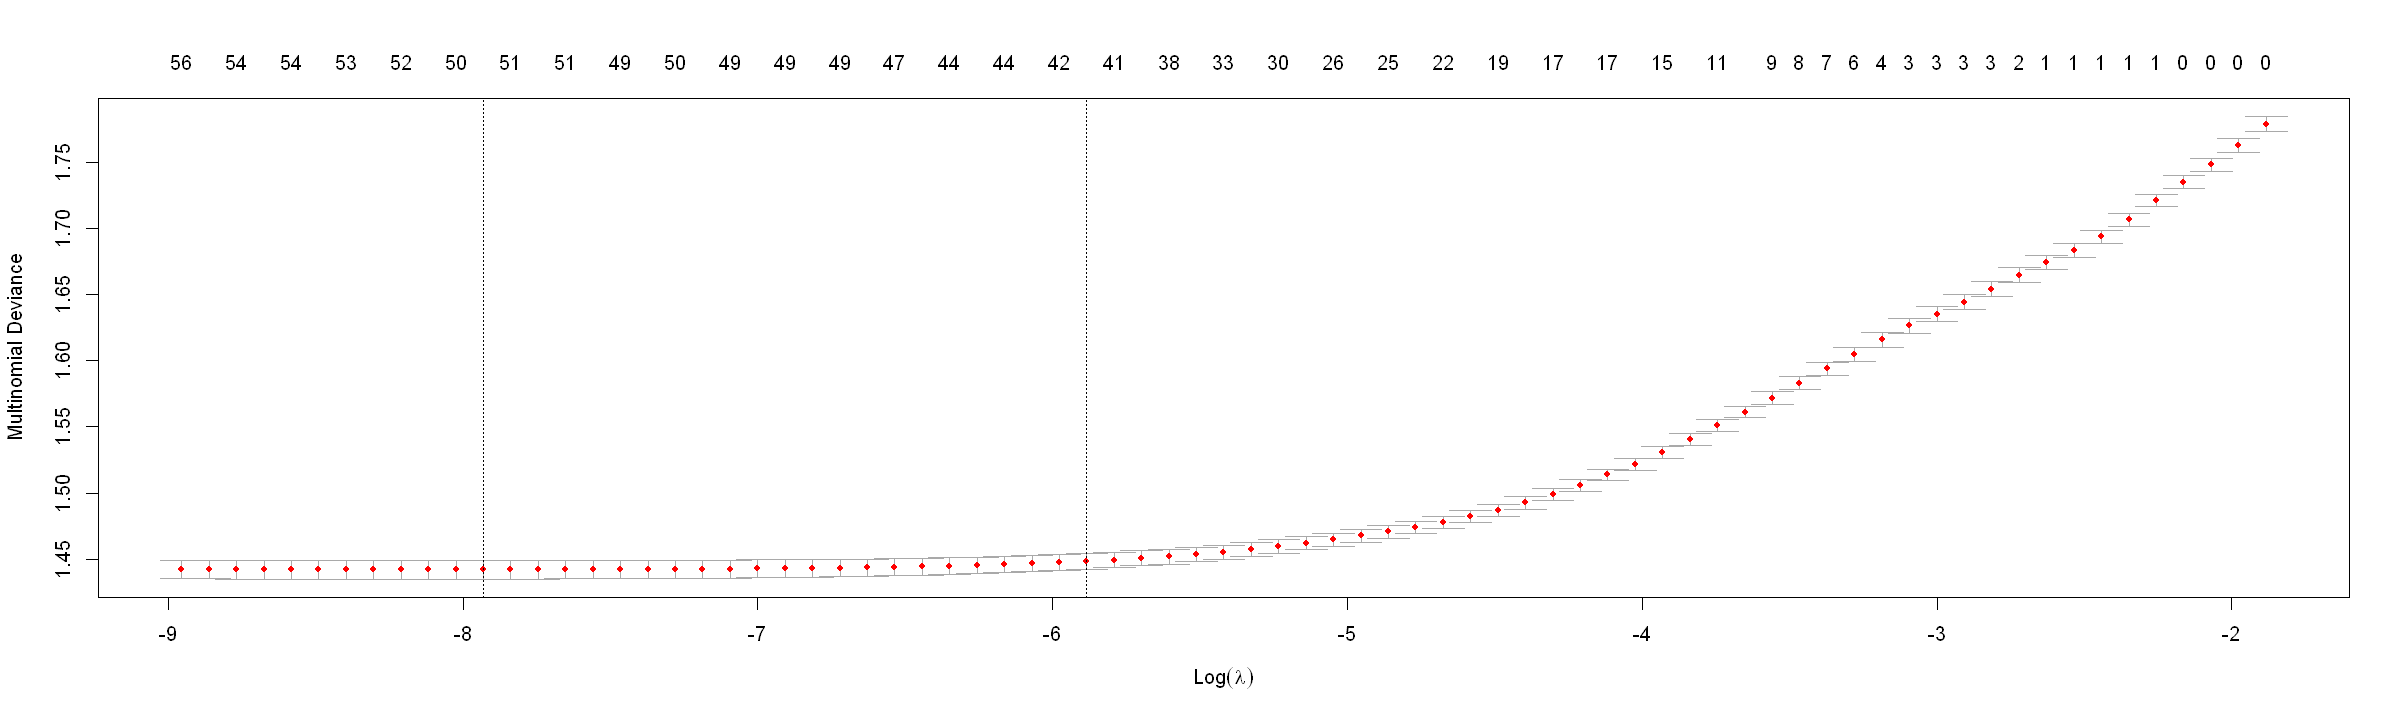

In [94]:
# plot(lasso_fit)

## Task 3 - Implementing a new model

### Explanation
Since from our top 3 models above Random Forest provided a good accuracy we decided to choose an extension of the same to see if we get a better accuracy. Different algorithms such as Adaptive Boosting and Categorical Boosting have been tried. In the end we decided to go with CatBoost because it gave a better performance and accuracy as compared to Adaptive Boosting. Also CatBoost can easily deal with categorical variables and does not require encoding.

### CatBoost Algorithm

In [95]:
install.packages('devtools')
devtools::install_url('https://github.com/catboost/catboost/releases/download/v0.25.1/catboost-R-Windows-0.25.1.tgz', INSTALL_opts = c("--no-multiarch"))

Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\downloaded_packages



Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.





Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.



v  checking for file 'C:\Users\HP\AppData\Local\Temp\RtmpaOmOn0\remotes4c3041753334\catboost/DESCRIPTION' (654ms)
-  preparing 'catboost': (726ms)
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  building 'catboost_0.25.1.tar.gz'
   


Installing package into 'C:/Users/HP/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



In [96]:
library(catboost)

In [97]:
indexes=createDataPartition(training_data_set_without_encoded$status_group, p=.70, list = F)
train_data_catboost <- training_data_set_without_encoded[indexes,]
test_data_catboost <- training_data_set_without_encoded[-indexes,]
train_data_label <- as.integer(train_data_catboost$status_group)-1
test_data_label <- as.integer(test_data_catboost$status_group)-1


col_factor <- c("funder","basin","payment","scheme_management","extraction_type_class","management","source","waterpoint_type_group","quality_group","quantity_group")
train_data_catboost[,col_factor] <- lapply(train_data_catboost[,col_factor],as.factor)
test_data_catboost[,col_factor] <- lapply(test_data_catboost[,col_factor],as.factor)


In [98]:
train_pool <- catboost.load_pool(data=subset(train_data_catboost,select=-status_group), 
                                 label = train_data_label,cat_features=c(2,6,8,9,10,11,12,13,14,15),)
test_pool <- catboost.load_pool(data=subset(test_data_catboost,select=-status_group), 
                                label = test_data_label,cat_features=c(2,6,8,9,10,11,12,13,14,15),)

### Since we have Nvidia in our systems we decided to execute it using GPU for faster execution. Please change GPU to CPU if Nvidia 418.xx or greater is not present.

In [99]:
print(Sys.time())
model <- catboost.train(train_pool, test_pool=test_pool,params = list(
task_type = "GPU" ,
loss_function = "MultiClass",
eval_metric="Accuracy",
random_seed = 10,
use_best_model = TRUE
))
print(Sys.time())

[1] "2021-05-19 00:11:58 IST"
Learning rate set to 0.153226
0:	learn: 0.5995189	test: 0.6056354	best: 0.6056354 (0)	total: 69.7ms	remaining: 1m 9s
1:	learn: 0.6617438	test: 0.6639537	best: 0.6639537 (1)	total: 122ms	remaining: 1m
2:	learn: 0.7044137	test: 0.7103166	best: 0.7103166 (2)	total: 173ms	remaining: 57.4s
3:	learn: 0.7062898	test: 0.7098675	best: 0.7103166 (2)	total: 226ms	remaining: 56.3s
4:	learn: 0.7096813	test: 0.7148069	best: 0.7148069 (4)	total: 274ms	remaining: 54.5s
5:	learn: 0.7131690	test: 0.7174450	best: 0.7174450 (5)	total: 315ms	remaining: 52.3s
6:	learn: 0.7155021	test: 0.7200269	best: 0.7200269 (6)	total: 357ms	remaining: 50.6s
7:	learn: 0.7242574	test: 0.7291199	best: 0.7291199 (7)	total: 396ms	remaining: 49.1s
8:	learn: 0.7237041	test: 0.7286147	best: 0.7291199 (7)	total: 439ms	remaining: 48.3s
9:	learn: 0.7252916	test: 0.7304109	best: 0.7304109 (9)	total: 481ms	remaining: 47.6s
10:	learn: 0.7266146	test: 0.7331051	best: 0.7331051 (10)	total: 514ms	remaining: 

[1] "2021-05-19 00:12:39 IST"


In [100]:
print(model)

CatBoost model (994 trees)
Loss function: MultiClass
Fit to 16 features


In [101]:
print(catboost.get_feature_importance(model,pool = train_pool))

                           [,1]
amount_tsh             2.142860
funder                10.917798
gps_height             5.341195
longitude              9.588181
latitude               9.827019
basin                  4.138758
population             5.003162
scheme_management      2.855447
extraction_type_class  7.481851
management             2.753674
payment                6.359920
quality_group          1.111670
quantity_group        15.423340
source                 6.855155
waterpoint_type_group  4.058728
age                    6.141242


In [102]:
catboost_pred <- catboost.predict(model,test_pool,prediction_type="Class")

In [103]:
print("Accuracy")
print(sum(ifelse(catboost_pred==test_data_label,1,0))/nrow(test_data_catboost)*100)

[1] "Accuracy"
[1] 79.45106


In [104]:
confusion_matrix_catboost <-table(test_data_label,catboost_pred)

In [105]:
print("Recall Per Class - CatBoost")
recall_catboost <- calc_recall(confusion_matrix_catboost)
print(recall_catboost)


[1] "Recall Per Class - CatBoost"
[1] 90.49194 25.94595 73.96640


In [106]:
print("Precision Per Class - CatBoost")
precision_catboost <- calc_precision(confusion_matrix_catboost)
print(precision_catboost)

[1] "Precision Per Class - CatBoost"
[1] 77.94890 60.75949 83.96352


In [107]:
print("F1 - SCore - CatBoost")
f1_catboost <- calc_f1(precision_catboost,recall_catboost)
print(f1_catboost)

[1] "F1 - SCore - CatBoost"
[1] 83.75341 36.36364 78.64854


## Task 4 - Predicting the outputs for the test file

### Preprocessing the test data set as the same as the training dataset above

In [108]:
testing_data_complete <- data.frame(testing_data_x)
testing_data_x <- subset(testing_data_x,select=-num_private)
testing_data_x <- subset(testing_data_x,select=-scheme_name)
testing_data_x$scheme_management[testing_data_x$scheme_management==NA]<-'Other'
testing_data_x$funder[testing_data_x$funder==NA]<-'Others'
testing_data_x <- subset(testing_data_x,select = -c(water_quality,payment_type,waterpoint_type,source_type,extraction_type,installer,quantity))
date_recorded_in_years <- as.numeric(format(as.Date(testing_data_x$"date_recorded"),"%Y"))
testing_data_x["age"] <-   date_recorded_in_years - testing_data_x["construction_year"]
testing_data_x$age[testing_data_x["age"]==as.numeric(format(as.Date(testing_data_x$"date_recorded"),"%Y"))] <- median(testing_data_x$age)
testing_data_x <- subset(testing_data_x,select=-c(date_recorded,construction_year))
testing_data_x["scheme_management"][is.na(testing_data_x["scheme_management"])]<- "Other"
testing_data_x <- subset(testing_data_x,select=-c(permit,public_meeting))
testing_data_x <- subset(testing_data_x, select = -c(wpt_name,subvillage,region_code,district_code,lga,ward,region))
testing_data_x["amount_tsh"] <- lapply((testing_data_x["amount_tsh"]),as.numeric)
testing_data_x["amount_tsh"][is.na(testing_data_x["amount_tsh"])]<- mean((testing_data_x$amount_tsh))
testing_data_x["gps_height"][is.na(testing_data_x["gps_height"])]<- mean(as.numeric(testing_data_x$gps_height))
testing_data_x["latitude"][is.na(testing_data_x["latitude"])]<- mean(as.numeric(testing_data_x$latitude))
testing_data_x["longitude"][is.na(testing_data_x["longitude"])]<- mean(as.numeric(testing_data_x$longitude))
testing_data_x$longitude[testing_data_x$longitude==0]<-median(testing_data_x$longitude)
testing_data_x["funder"][is.na(testing_data_x["funder"])] <- "Other"
testing_data_x <- subset(testing_data_x,select=-c(id))


### Predicting the functionality of water pump using the Random Forest model. We used Random Forest for our final selection as it gave the best accuracy.

In [109]:
predict_test <- predict(model_final_rf,testing_data_x)
predict_final_dataframe <- data.frame("id"=testing_data_complete$id,"status_group"=predict_test)

In [110]:
write.csv(predict_final_dataframe,"Submission.csv")

# Conclusions

After running all the models, a summarised view of their accuracies is described below. 

| Model | Accuracy   |
|------|------|
|   Random Forest | 81.23%|
|  KNN | 77.03%|
|  Decision Tree | 77.07%|
|  CatBoost | 79.63%|

Class-wise Precision Recall and F1 at the time of code execution

| Model |Class| Precision   |Recall|F1-Score|
|------|------|-----|-----|-----|
|   Random Forest |Functional|80.88|89.68|85.06|
|  Random Forest |Functional Needs Repair|56.76|33.70|42.29|
|  Random Forest |Non Functional|84.81|78.29|81.42|


| Model |Class| Precision   |Recall|F1-Score|
|------|------|-----|-----|-----|
|   KNN |Functional|78.42|85.49|85.06|
|  KNN |Functional Needs Repair|63.52|40.89|49.76|
|  KNN |Non Functional|76.98|78.39|74.61|


| Model |Class| Precision   |Recall|F1-Score|
|------|------|-----|-----|-----|
|   Decision Tree |Functional|66.72|93.46|77.86|
|  Decision Tree|Functional Needs Repair|NaN|0|NaN|
|  Decision Tree |Non Functional|81.98|51.96|63.60|


| Model |Class| Precision   |Recall|F1-Score|
|------|------|-----|-----|-----|
|  CatBoost |Functional|77.85|90.62|83.75|
|  CatBoost|Functional Needs Repair|57.95|25.32|35.24|
|  CatBoost |Non Functional|84.31|73.74|78.67|


----
F1 Scores take into account both precision and recall. Random Forest and CatBoost are proving to be good for Functional and Non Functional. They produce a low F1 Score for Functional Needs Repair. Therefore we can say that they are a bit biased. Same for KNN. But KNN gives a better F1 Score for Functional Needs Repair. Decision Trees are unable to predict any Functional Needs Repair

### Notes -
1. After the recording of the presentation we realised that the Lasso model gave us an accuracy of 68% and not 54% as mentioned in the video. 

2. The PDF report has been generated in A2 layout mode to prevent trimming of the code and comments leading to small number of pages.